In [1]:
import pandas as pd
import numpy as np

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection

import seaborn as sns

In [2]:
sns.set()

In [3]:
df = pd.read_csv('Cleaned/exploratory_data_analisis.csv')
data = df
df.head()

,url,pnns_groups_1,product_name,countries_tags,ingredients_text,additives_fr,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
0,http://world-fr.openfoodfacts.org/produit/0000...,Beverages,"Pepsi, Nouveau goÃ»t !",en:france,"Eau gazÃ©ifiÃ©e, sucre, colorant caramel E150d...","E150d - Caramel au sulfite d'ammonium,E338 - A...",e,13.0,177.0,0.0,0.0,10.4,0.0,0.0,0.0254,10.4
1,http://world-fr.openfoodfacts.org/produit/0000...,Beverages,7Up,en:france,"Eau gazÃ©ifiÃ©e, sucre, acidifiants (acide cit...","E330 - Acide citrique,E296 - Acide malique,E33...",e,13.0,177.0,0.0,0.0,10.4,0.1,0.0,0.1000,10.4
2,http://world-fr.openfoodfacts.org/produit/0000...,Sugary snacks,Madeleines nature,en:france,"Farine de _blÃ©_, huile de colza, sucre, _oeuf...","E422 - GlycÃ©rol,E503 - Carbonates d'ammonium,...",d,12.0,1900.0,23.0,2.5,55.0,1.5,6.0,0.6600,26.0
3,http://world-fr.openfoodfacts.org/produit/0000...,Sugary snacks,Cakes Raisins,en:france,"Farine de _blÃ©_, _Åufs_ frais, huile de colz...","E422 - GlycÃ©rol,E503 - Carbonates d'ammonium,...",d,13.0,1768.0,19.0,2.5,56.0,1.8,5.8,0.6500,28.0
4,http://world-fr.openfoodfacts.org/produit/0000...,Sugary snacks,Cakes aux Fruits,en:france,"Fruits 37.4% [fruits confits 21,5% [fruits (pa...","E202 - Sorbate de potassium,E220 - Anhydride s...",d,12.0,1670.0,15.0,2.0,60.0,1.5,4.9,0.6000,34.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37582 entries, 0 to 37581
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url                      37582 non-null  object 
 1   pnns_groups_1            37582 non-null  object 
 2   product_name             37492 non-null  object 
 3   countries_tags           37582 non-null  object 
 4   ingredients_text         33321 non-null  object 
 5   additives_fr             20301 non-null  object 
 6   nutrition_grade_fr       37582 non-null  object 
 7   nutrition-score-fr_100g  37582 non-null  float64
 8   energy_100g              37582 non-null  float64
 9   fat_100g                 37582 non-null  float64
 10  saturated_fat_100g       37582 non-null  float64
 11  carbohydrates_100g       37582 non-null  float64
 12  fiber_100g               37582 non-null  float64
 13  proteins_100g            37582 non-null  float64
 14  salt_100g             

## 1 Analyse univarié 

Text(0.5, 1.0, 'salt')

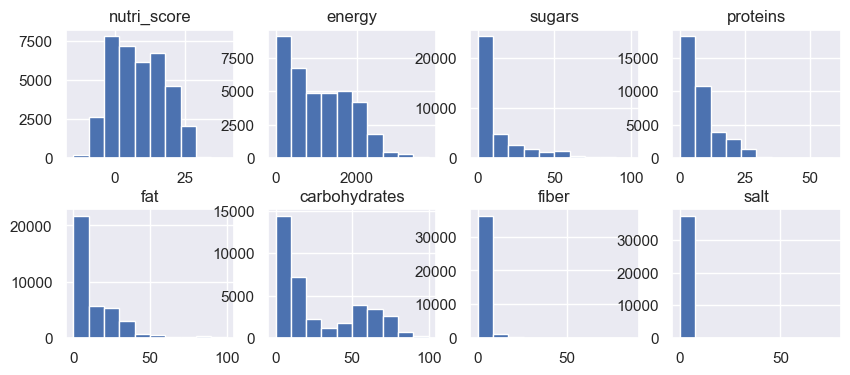

In [5]:
fig, ax = plt.subplots(2,4,figsize= (10,4))
fig.subplots_adjust(hspace=0.4)
ax[0][0].hist(df['nutrition-score-fr_100g'])
ax[0][0].set_title('nutri_score')
ax[0][1].hist(df['energy_100g'])
ax[0][1].set_title('energy')
ax[0][2].hist(df['sugars_100g'])
ax[0][2].set_title('sugars')
ax[0][3].hist(df['proteins_100g'])
ax[0][3].set_title('proteins')
ax[1][0].hist(df['fat_100g'])
ax[1][0].set_title('fat')
ax[1][1].hist(df['carbohydrates_100g'])
ax[1][1].set_title('carbohydrates')
ax[1][2].hist(df['fiber_100g'])
ax[1][2].set_title('fiber')
ax[1][3].hist(df['salt_100g'])
ax[1][3].set_title('salt')

In [6]:
df.describe()

,nutrition-score-fr_100g,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
count,37582.000000,37582.000000,37582.000000,37582.000000,37582.000000,37582.000000,37582.000000,37582.000000,37582.000000
mean,8.246661,1082.027955,12.756973,5.310915,27.154013,2.113868,7.608871,0.855553,12.657389
std,9.134388,768.081415,15.735623,8.257981,27.019546,3.191759,7.266609,1.440535,18.090373
min,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000
25%,1.000000,389.000000,1.000000,0.200000,4.500000,0.000000,1.600000,0.068000,1.000000
50%,8.000000,1000.000000,6.500000,1.800000,13.400000,1.500000,6.000000,0.558800,4.000000
75%,15.000000,1637.000000,21.400000,7.200000,53.000000,2.700000,11.000000,1.200000,15.400000
max,40.000000,3770.000000,99.900000,95.000000,99.900000,86.200000,58.800000,76.200000,99.900000


In [7]:
df

,url,pnns_groups_1,product_name,countries_tags,ingredients_text,additives_fr,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
0,http://world-fr.openfoodfacts.org/produit/0000...,Beverages,"Pepsi, Nouveau goÃ»t !",en:france,"Eau gazÃ©ifiÃ©e, sucre, colorant caramel E150d...","E150d - Caramel au sulfite d'ammonium,E338 - A...",e,13.0,177.0,0.0,0.00,10.40,0.000,0.000,0.0254,10.40
1,http://world-fr.openfoodfacts.org/produit/0000...,Beverages,7Up,en:france,"Eau gazÃ©ifiÃ©e, sucre, acidifiants (acide cit...","E330 - Acide citrique,E296 - Acide malique,E33...",e,13.0,177.0,0.0,0.00,10.40,0.100,0.000,0.1000,10.40
2,http://world-fr.openfoodfacts.org/produit/0000...,Sugary snacks,Madeleines nature,en:france,"Farine de _blÃ©_, huile de colza, sucre, _oeuf...","E422 - GlycÃ©rol,E503 - Carbonates d'ammonium,...",d,12.0,1900.0,23.0,2.50,55.00,1.500,6.000,0.6600,26.00
3,http://world-fr.openfoodfacts.org/produit/0000...,Sugary snacks,Cakes Raisins,en:france,"Farine de _blÃ©_, _Åufs_ frais, huile de colz...","E422 - GlycÃ©rol,E503 - Carbonates d'ammonium,...",d,13.0,1768.0,19.0,2.50,56.00,1.800,5.800,0.6500,28.00
4,http://world-fr.openfoodfacts.org/produit/0000...,Sugary snacks,Cakes aux Fruits,en:france,"Fruits 37.4% [fruits confits 21,5% [fruits (pa...","E202 - Sorbate de potassium,E220 - Anhydride s...",d,12.0,1670.0,15.0,2.00,60.00,1.500,4.900,0.6000,34.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37577,http://world-fr.openfoodfacts.org/produit/9606...,Sugary snacks,Spearmint sans sucres,en:france,"Ãdulcorants : sorbitol, sucralose, acÃ©sulfam...","E420 - Sorbitol,E955 - Sucralose,E950 - AcÃ©su...",c,4.0,1017.0,1.3,1.28,95.87,0.005,0.040,0.0050,0.12
37578,http://world-fr.openfoodfacts.org/produit/9611...,Sugary snacks,Fisherman's Friend Miel-Citron,en:france,"Ãdulcorants : sorbitols, sucralose, acÃ©sulfa...","E420 - Sorbitol,E955 - Sucralose,E950 - AcÃ©su...",b,2.0,1031.0,1.3,1.28,95.31,1.470,0.004,0.0010,0.10
37579,http://world-fr.openfoodfacts.org/produit/9778...,Salty snacks,Nature cheddar and red onion crisps,"en:france,en:united-kingdom",NaN,NaN,c,9.0,2155.0,30.3,3.40,51.00,5.600,7.800,1.3500,1.80
37580,http://world-fr.openfoodfacts.org/produit/9847...,Cereals and potatoes,Tartines craquantes bio au sarrasin,en:france,NaN,NaN,a,-4.0,1643.0,2.8,0.60,74.80,5.900,13.000,0.6800,2.60


## 2 Analyse bivarié

<AxesSubplot:xlabel='carbohydrates_100g', ylabel='sugars_100g'>

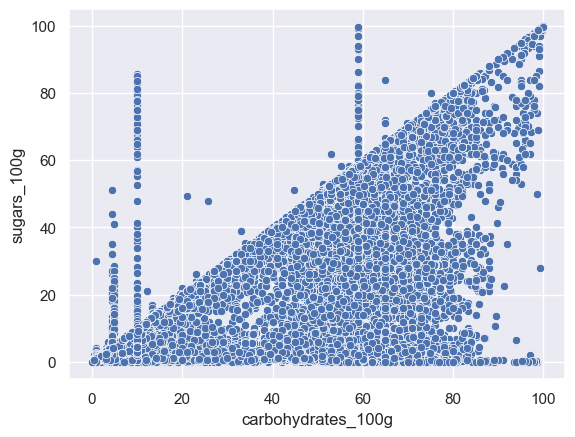

In [8]:
sns.scatterplot(data = df, x='carbohydrates_100g',y='sugars_100g' )

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='nutrition-score-fr_100g'>

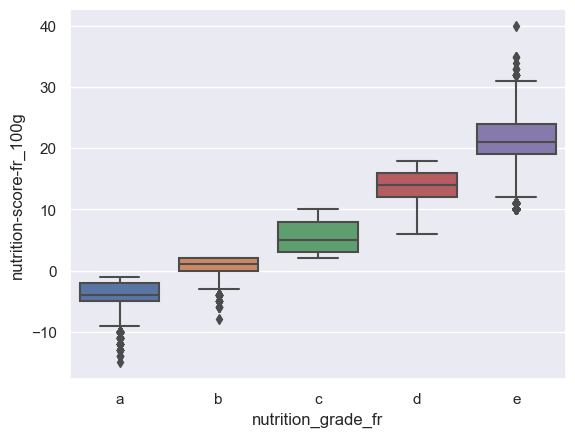

In [9]:
sns.boxplot(data= df.sort_values('nutrition_grade_fr'),y='nutrition-score-fr_100g',x='nutrition_grade_fr')

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='energy_100g'>

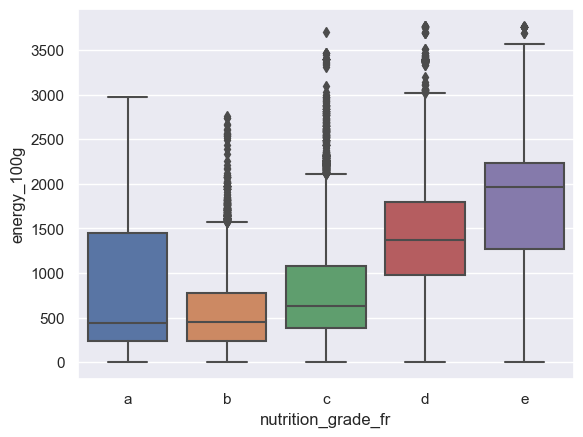

In [10]:
sns.boxplot(data= df.sort_values('nutrition_grade_fr'),y='energy_100g',x='nutrition_grade_fr')

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='fat_100g'>

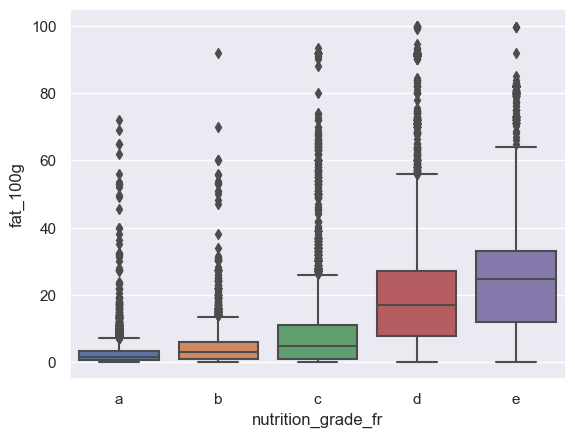

In [11]:
sns.boxplot(data= df.sort_values('nutrition_grade_fr'),y='fat_100g',x='nutrition_grade_fr')

<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='saturated_fat_100g'>

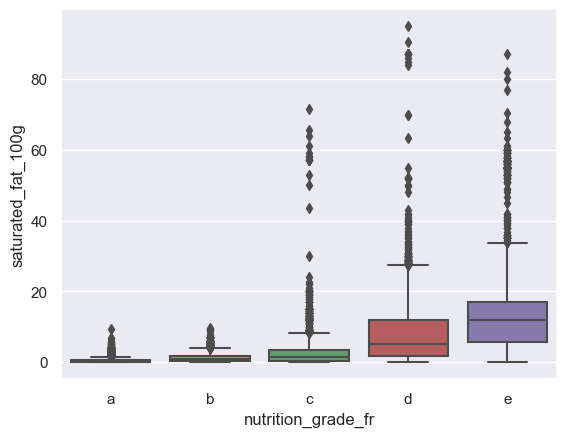

In [12]:
sns.boxplot(data= df.sort_values('nutrition_grade_fr'),y='saturated_fat_100g',x='nutrition_grade_fr')

<AxesSubplot:xlabel='energy_100g', ylabel='Density'>

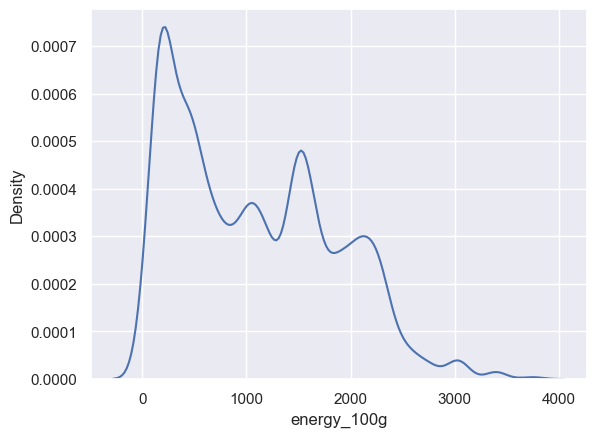

In [13]:
sns.kdeplot(data=df,x='energy_100g')

<AxesSubplot:xlabel='nutrition-score-fr_100g', ylabel='Density'>

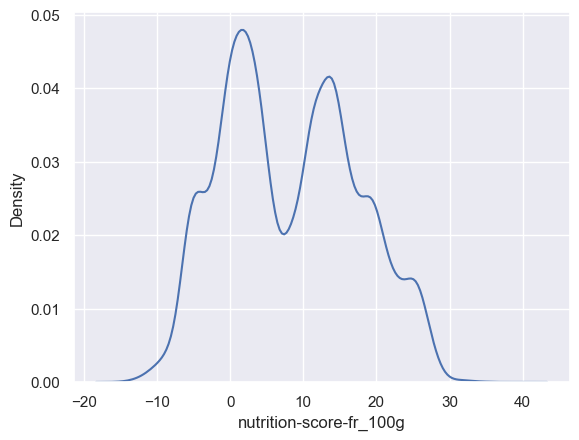

In [14]:
sns.kdeplot(data=df,x='nutrition-score-fr_100g')

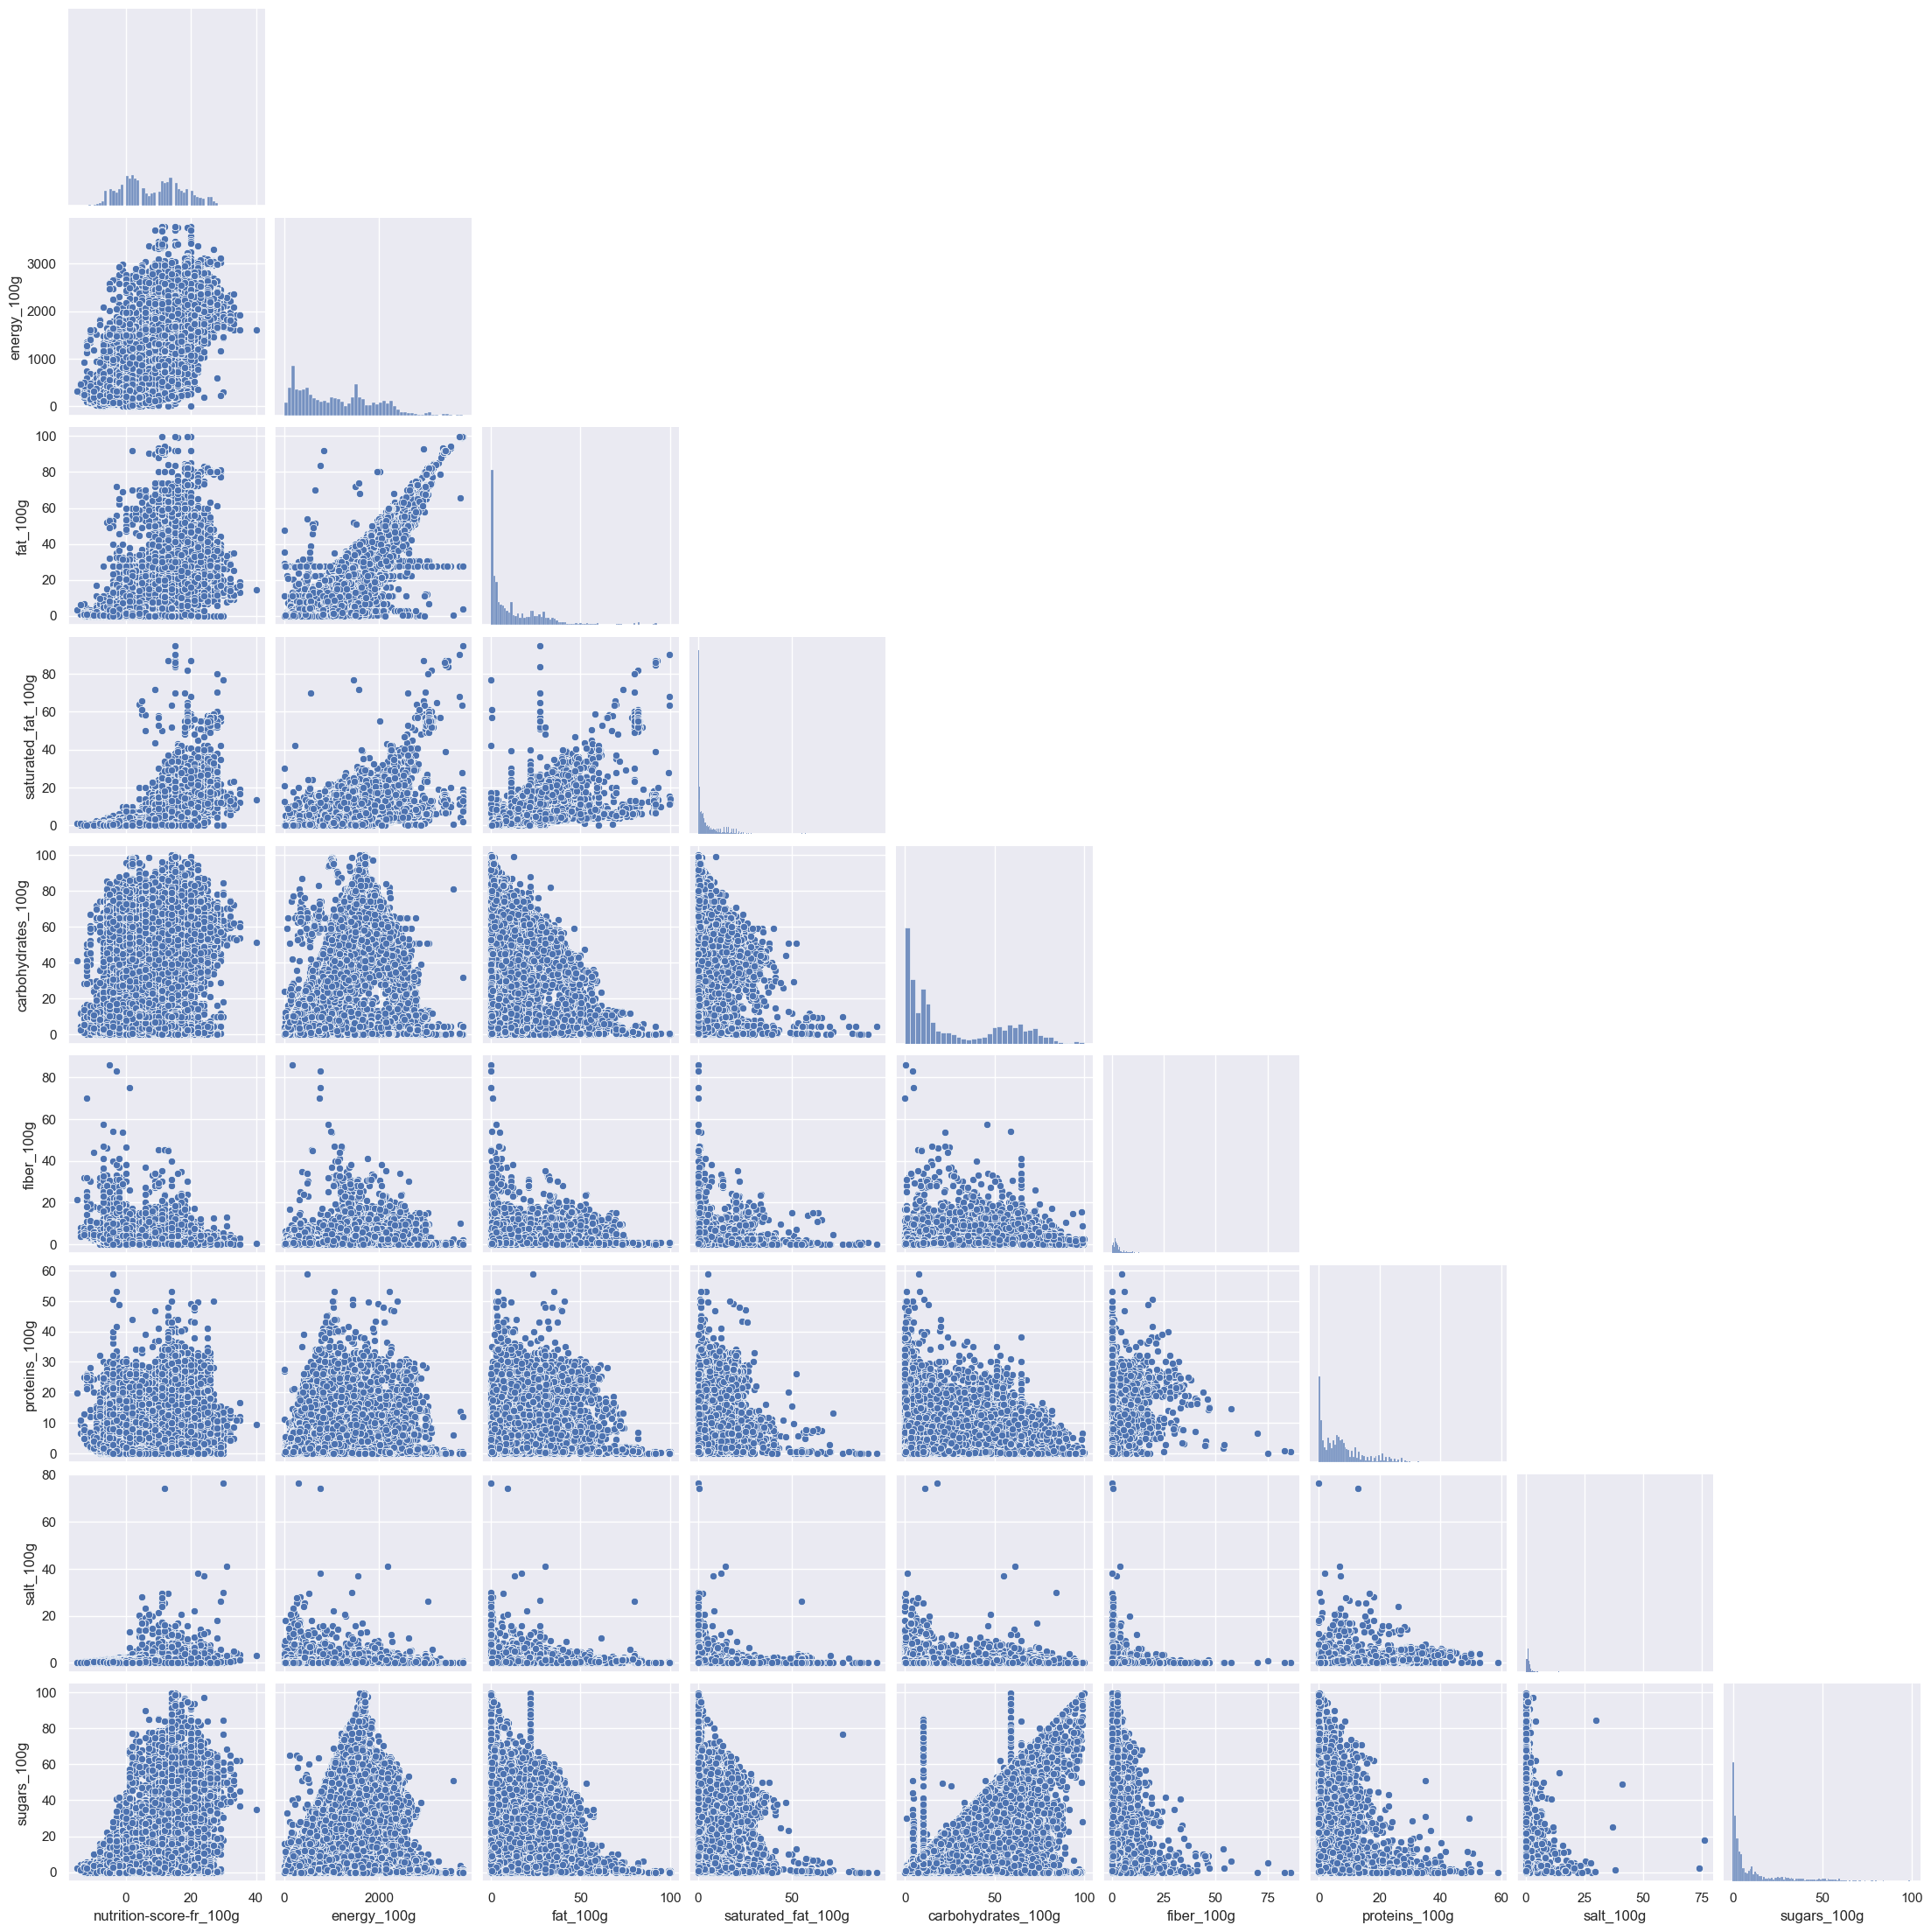

In [15]:
sns.pairplot(df,corner=True)


### 2.1 ANOVA

Le test de l'ANOVA (analyse de la variance) a pour but de vérifier si une variable qualitative influence une variable quantitative

Les conditions de l'ANVOA paramétrique à un facteur

- Les échantillons sont indépendants et sont tirés de populations normalement distribuées.
- Les variances des populations sont égales (homoscédasticité).
- Les échantillons sont de taille égale.

1) Confirmer avec le test statistique de shapiro que chaque variable quantitative suive une distribution normale.Conkfoi Si ok
2) Confirmer que les variancs sont égales
3) Vérifier que le taille des échantillon sont égales. 

L'hypothèse nulle : les moyennes des nutrigradé sont égales pour chaque variable quantitative.

Condition pour le test ANOVA (paramétrique) à un facteur : 

- Les écahntillons sont indépendant et ils sont issues d'une même population  
- La variable quantitative étudié doit suivre une loi normale

hypothèse alternative : La variable nutri_grade n'infleance pas la variable quantitive (par exemple carbohydrate_100g)

#### Normaliser les variables avec la méthode de box-cox

Text(0.5, 1.0, 'variable salt normé')

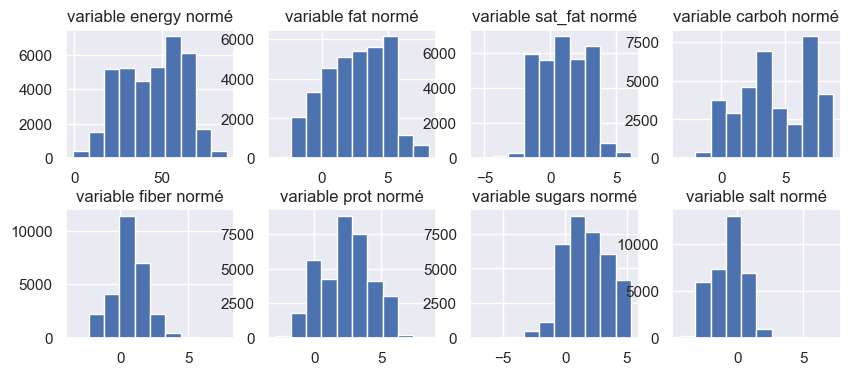

In [16]:
import scipy

tr_energy = df[df['energy_100g']>0]
tr_energy,_ = scipy.stats.boxcox(tr_energy['energy_100g'])
tr_fat = df[df['fat_100g']>0]
tr_fat,_ = scipy.stats.boxcox(tr_fat['fat_100g'])
tr_satfat = df[df['saturated_fat_100g']>0]
tr_satfat,_ = scipy.stats.boxcox(tr_satfat['saturated_fat_100g'])
tr_carboh = df[df['carbohydrates_100g']>0]
tr_carboh,_ = scipy.stats.boxcox(tr_carboh['carbohydrates_100g'])
tr_fiber = df[df['fiber_100g']>0]
tr_fiber,_ = scipy.stats.boxcox(tr_fiber['fiber_100g'])
tr_prot = df[df['proteins_100g']>0]
tr_prot,_ = scipy.stats.boxcox(tr_prot['proteins_100g'])
tr_sugars = df[df['sugars_100g']>0]
tr_sugars,_ = scipy.stats.boxcox(tr_sugars['sugars_100g'])
tr_salt = df[df['salt_100g']>0]
tr_salt,_ = scipy.stats.boxcox(tr_salt['salt_100g'])

fig, ax = plt.subplots(2,4,figsize= (10,4))
fig.subplots_adjust(hspace=0.4)
ax[0][0].hist(tr_energy)
ax[0][0].set_title('variable energy normé')
ax[0][1].hist(tr_fat)
ax[0][1].set_title('variable fat normé')
ax[0][2].hist(tr_satfat)
ax[0][2].set_title('variable sat_fat normé')
ax[0][3].hist(tr_carboh)
ax[0][3].set_title('variable carboh normé')
ax[1][0].hist(tr_fiber)
ax[1][0].set_title('variable fiber normé')
ax[1][1].hist(tr_prot)
ax[1][1].set_title('variable prot normé')
ax[1][2].hist(tr_sugars)
ax[1][2].set_title('variable sugars normé')
ax[1][3].hist(tr_salt)
ax[1][3].set_title('variable salt normé')

In [17]:
# Hypothène nulles : la variable suit la loi normale de Gauss.

print(f'\n result nutrition-score-fr_100g :' ,{scipy.stats.shapiro(df['nutrition-score-fr_100g'])},
      ',\n result energy_100g :',{scipy.stats.shapiro(df['energy_100g'])},
      ',\n result fat_100g :',{scipy.stats.shapiro(df['fat_100g'])},
      ',\n result saturated_fat_100g :',{scipy.stats.shapiro(df['saturated_fat_100g'])},
      ',\n result carbohydrates_100g :',{scipy.stats.shapiro(df['carbohydrates_100g'])},
      ',\n result fiber_100g :',{scipy.stats.shapiro(df['fiber_100g'])},
      ',\n result proteins_100g :',{scipy.stats.shapiro(df['proteins_100g'])},
      ',\n result salt_100g :',{scipy.stats.shapiro(df['salt_100g'])},
      ',\n result sugars_100g :',{scipy.stats.shapiro(df['sugars_100g'])})


 result nutrition-score-fr_100g : {ShapiroResult(statistic=0.972797691822052, pvalue=0.0)} ,
 result energy_100g : {ShapiroResult(statistic=0.9416615962982178, pvalue=0.0)} ,
 result fat_100g : {ShapiroResult(statistic=0.7779794335365295, pvalue=0.0)} ,
 result saturated_fat_100g : {ShapiroResult(statistic=0.6575183272361755, pvalue=0.0)} ,
 result carbohydrates_100g : {ShapiroResult(statistic=0.8448762893676758, pvalue=0.0)} ,
 result fiber_100g : {ShapiroResult(statistic=0.60370934009552, pvalue=0.0)} ,
 result proteins_100g : {ShapiroResult(statistic=0.8708255887031555, pvalue=0.0)} ,
 result salt_100g : {ShapiroResult(statistic=0.483495831489563, pvalue=0.0)} ,
 result sugars_100g : {ShapiroResult(statistic=0.711104691028595, pvalue=0.0)}


C:\Users\Dragomir\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [18]:
# Calcule du F ratio

def ANOVA(x,y,col):
    
    moyenne_y = y.mean()
    classes = []
    
    sce_intra = []
    
    for classe in x:
        yi_classe = classe
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    # calcul du SCE interclasse 
    SCE_inter = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    
    # calcul du SCE intraclasse 
    for X,y_classe in zip(x,classes):     
        sce_intra.append(np.sum((X - y_classe['moyenne_classe'])**2))
        
    N =6940+5299+8005+10100+7238
    SCE_INTRA = sce_intra[0] + sce_intra[1] + sce_intra[2] + sce_intra[3] + sce_intra[4]
    mean_sce_intra = SCE_INTRA/ (N-1)
    mean_sce_inter = SCE_inter/ (len(sce_intra)-1)
    F = mean_sce_inter/mean_sce_intra
    
    print(f'variable : {col} ,  F ratio = ',F)
    


for col in df.select_dtypes(include = np.number).columns:

    group1 = df[df['nutrition_grade_fr'] == 'a'][col]
    group2 = df[df['nutrition_grade_fr'] == 'b'][col]
    group3 = df[df['nutrition_grade_fr'] == 'c'][col]
    group4 = df[df['nutrition_grade_fr'] == 'd'][col]
    group5 = df[df['nutrition_grade_fr'] == 'e'][col]

    x = [group1,group2,group3,group4,group5]

    ANOVA(x,df[col], col)


variable : nutrition-score-fr_100g ,  F ratio =  86980.25705388062
variable : energy_100g ,  F ratio =  3838.6450422433704
variable : fat_100g ,  F ratio =  3604.352086689889
variable : saturated_fat_100g ,  F ratio =  4145.307072955095
variable : carbohydrates_100g ,  F ratio =  467.13472037206554
variable : fiber_100g ,  F ratio =  491.9405090473686
variable : proteins_100g ,  F ratio =  303.97479267435665
variable : salt_100g ,  F ratio =  489.7762497748358
variable : sugars_100g ,  F ratio =  2192.902826954475


In [19]:
# Test ANOVA paramétrique à un facteur

def test_ANOVA(x,cols):
    
    P_VALUE = []
    f_value1, p_value1 = scipy.stats.f_oneway(x[0],x[1],x[2],x[3],x[4])
    P_VALUE.append(p_value1)
    print(f'variable : {cols}, F ratio = {f_value1}, p-value = {p_value1}\n')
    
    return P_VALUE

P_value = []

for cols in df.select_dtypes(include = np.number).columns:
    
    group1 = df[df['nutrition_grade_fr'] == 'a'][cols]
    group2 = df[df['nutrition_grade_fr'] == 'b'][cols]
    group3 = df[df['nutrition_grade_fr'] == 'c'][cols]
    group4 = df[df['nutrition_grade_fr'] == 'd'][cols]
    group5 = df[df['nutrition_grade_fr'] == 'e'][cols]

    x = [group1,group2,group3,group4,group5]
    
    P_value.append(test_ANOVA(x,cols))
P_value    

variable : nutrition-score-fr_100g, F ratio = 86970.99915685227, p-value = 0.0

variable : energy_100g, F ratio = 3838.236469289779, p-value = 0.0

variable : fat_100g, F ratio = 3603.9684511201144, p-value = 0.0

variable : saturated_fat_100g, F ratio = 4144.865859887511, p-value = 0.0

variable : carbohydrates_100g, F ratio = 467.0850000644223, p-value = 0.0

variable : fiber_100g, F ratio = 491.88814849187884, p-value = 0.0

variable : proteins_100g, F ratio = 303.94243858130784, p-value = 8.92278287460965e-258

variable : salt_100g, F ratio = 489.72411957606505, p-value = 0.0

variable : sugars_100g, F ratio = 2192.6694214754175, p-value = 0.0



[[0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [0.0],
 [8.92278287460965e-258],
 [0.0],
 [0.0]]

In [20]:
# Test ANOVA non paramétrique à un facteur

def test_ANOVA(x,cols):
    
    f_value1, p_value1 = scipy.stats.kruskal(x[0],x[1],x[2],x[3],x[4])

    #print(f'variable cols : {cols}, f_test : {f_value1}, p_value1 : {p_value1}\n')
    return p_value1
    
P_value = []

global P_value
for cols in df.select_dtypes(include = np.number).columns:
    
    group1 = df[df['nutrition_grade_fr'] == 'a'][cols]
    group2 = df[df['nutrition_grade_fr'] == 'b'][cols]
    group3 = df[df['nutrition_grade_fr'] == 'c'][cols]
    group4 = df[df['nutrition_grade_fr'] == 'd'][cols]
    group5 = df[df['nutrition_grade_fr'] == 'e'][cols]

    x = [group1,group2,group3,group4,group5]
    
    
    P_value.append(test_ANOVA(x,cols))
    
pd.DataFrame(P_value,index=df.select_dtypes(include=np.number).columns, columns=['p_value'])


,p_value
nutrition-score-fr_100g,0.000000e+00
energy_100g,0.000000e+00
fat_100g,0.000000e+00
saturated_fat_100g,0.000000e+00
carbohydrates_100g,5.799406e-255
fiber_100g,0.000000e+00
proteins_100g,3.641067e-182
salt_100g,0.000000e+00
sugars_100g,0.000000e+00


<AxesSubplot:>

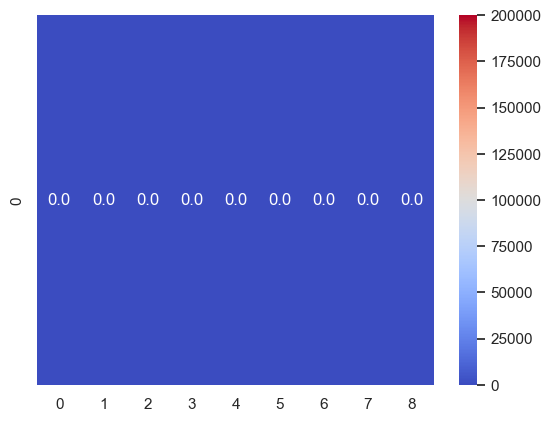

In [21]:
# analyse de la ralation entre la valuer nutri_grade et les valeurs quantitatives

pvalue = np.array(P_value)


pvalue= pvalue.reshape(1,9)

sns.heatmap(data = pvalue,annot=True,vmin=0,vmax=200000,cmap='coolwarm',fmt='.1f')


In [22]:
pd.DataFrame([df[df['nutrition_grade_fr'] == 'a'].mean(),
              df[df['nutrition_grade_fr'] == 'b'].mean(),
              df[df['nutrition_grade_fr'] == 'c'].mean(),
              df[df['nutrition_grade_fr'] == 'd'].mean(),
              df[df['nutrition_grade_fr'] == 'e'].mean()],
             index = ['mean_A','mean_B','mean_C','mean_D','mean_E']).T

C:\Users\Dragomir\AppData\Local\Temp\ipykernel_36932\2991613337.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pd.DataFrame([df[df['nutrition_grade_fr'] == 'a'].mean(),
C:\Users\Dragomir\AppData\Local\Temp\ipykernel_36932\2991613337.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['nutrition_grade_fr'] == 'b'].mean(),
C:\Users\Dragomir\AppData\Local\Temp\ipykernel_36932\2991613337.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df[df['nutrition_grade_fr'] == 'c'].mean

,mean_A,mean_B,mean_C,mean_D,mean_E
nutrition-score-fr_100g,-3.953294,0.854340,5.485575,13.656272,20.859058
energy_100g,707.630826,571.597725,824.229052,1375.873373,1689.812444
fat_100g,2.654610,4.440352,8.641650,18.999004,24.372120
saturated_fat_100g,0.547365,1.165386,2.398949,7.655660,12.862095
carbohydrates_100g,27.338875,18.292538,22.144426,28.839691,36.656317
fiber_100g,3.604655,1.635211,1.817297,1.823431,1.768921
proteins_100g,7.332897,6.274237,6.989330,9.665300,6.666032
salt_100g,0.338807,0.605568,0.882071,1.255394,0.946536
sugars_100g,4.228591,4.694623,9.555951,15.292135,26.322290


In [23]:
df.describe()

,nutrition-score-fr_100g,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
count,37582.000000,37582.000000,37582.000000,37582.000000,37582.000000,37582.000000,37582.000000,37582.000000,37582.000000
mean,8.246661,1082.027955,12.756973,5.310915,27.154013,2.113868,7.608871,0.855553,12.657389
std,9.134388,768.081415,15.735623,8.257981,27.019546,3.191759,7.266609,1.440535,18.090373
min,-15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.100000
25%,1.000000,389.000000,1.000000,0.200000,4.500000,0.000000,1.600000,0.068000,1.000000
50%,8.000000,1000.000000,6.500000,1.800000,13.400000,1.500000,6.000000,0.558800,4.000000
75%,15.000000,1637.000000,21.400000,7.200000,53.000000,2.700000,11.000000,1.200000,15.400000
max,40.000000,3770.000000,99.900000,95.000000,99.900000,86.200000,58.800000,76.200000,99.900000


<AxesSubplot:>

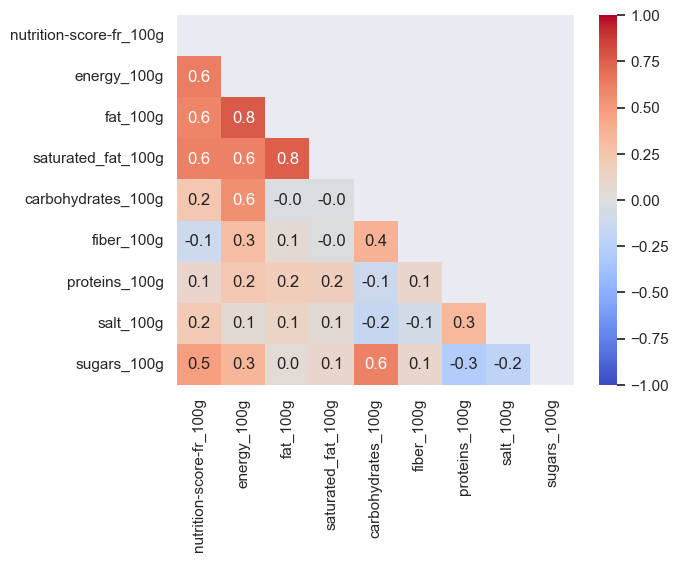

In [24]:
corr = df.corr().round(2)
mask = np.triu(corr)

sns.heatmap(data =corr,annot=True,vmin=-1,vmax=1,cmap='coolwarm',fmt='.1f',mask = mask)

### Test du khi2 d'indépendance

hypothèse nulle : la variable nutrigrad_fr et la variable pnnsgroup1 sont indépendantes. 

Sous un seuil à 5 % nous pouvons rejeter l'hypothèse. 

In [25]:
tab_contigence = pd.crosstab(index=df.pnns_groups_1,columns=df.nutrition_grade_fr)
index = tab_contigence.index
new_index = index.insert(11,'total_row')
tab_contigence = pd.DataFrame(tab_contigence.select_dtypes(include = np.number),index = new_index)

values = tab_contigence.sum(axis = 1)
tab_contigence['total'] = values
tab_contigence.loc['total_row',:] = tab_contigence.sum(axis = 0)
tab_contigence

nutrition_grade_fr,a,b,c,d,e,total
pnns_groups_1,,,,,,
Beverages,143.0,541.0,1242.0,679.0,1637.0,4242.0
Cereals and potatoes,2540.0,784.0,972.0,600.0,61.0,4957.0
Composite foods,1100.0,1493.0,1271.0,715.0,56.0,4635.0
Fat and sauces,74.0,188.0,669.0,1061.0,577.0,2569.0
Fish Meat Eggs,407.0,556.0,1171.0,1218.0,812.0,4164.0
Fruits and vegetables,1880.0,486.0,299.0,28.0,0.0,2693.0
Milk and dairy products,366.0,888.0,1245.0,2218.0,206.0,4923.0
Salty snacks,41.0,61.0,483.0,904.0,291.0,1780.0
Sugary snacks,48.0,231.0,621.0,2431.0,3524.0,6855.0


In [26]:
tx = tab_contigence.loc['Beverages',["total"]]
ty = tab_contigence.loc[["total_row"],'a']
tx = np.matrix(tx)

In [27]:
tx = tab_contigence.loc[:,["total"]]
ty = tab_contigence.loc[["total_row"],:]
tx = np.matrix(tx)
n = len(df)
indep = tx.dot(ty) / n

effectif_theorique = pd.DataFrame(indep, index = tab_contigence.index, columns=tab_contigence.columns)
effectif_theorique

measure = (tab_contigence - effectif_theorique)**2/effectif_theorique
T = measure.sum().sum()

print(f' T = {T}' )

 T = 24208.74748705729


In [28]:
test_statistique, p_value, dll, _ = scipy.stats.chi2_contingency(tab_contigence)

print('la p_value est égale à 0, on peut rejeté H0.')

test_statistique, p_value, dll


la p_value est égale à 0, on peut rejeté H0.


(24208.747487057295, 0.0, 55)

In [29]:
p_value = scipy.stats.chi2.sf(24206.29543023122, 1)
print("La p-value est :", p_value)

La p-value est : 0.0


In [30]:
effectif_theorique

nutrition_grade_fr,a,b,c,d,e,total
pnns_groups_1,,,,,,
Beverages,783.001277,598.227875,903.775584,1140.132031,816.863232,4242.0
Cereals and potatoes,914.978154,699.060721,1056.109281,1332.304215,954.547629,4957.0
Composite foods,855.542414,653.650684,987.505854,1245.759539,892.541509,4635.0
Fat and sauces,474.193843,362.293119,547.336039,690.475999,494.701000,2569.0
Fish Meat Eggs,768.603800,587.227928,887.157363,1119.167793,801.843116,4164.0
Fruits and vegetables,497.082140,379.780214,573.754750,723.803762,518.579134,2693.0
Milk and dairy products,908.702331,694.265872,1048.865441,1323.165957,948.000399,4923.0
Salty snacks,328.557820,251.024427,379.236337,478.414667,342.766750,1780.0
Sugary snacks,1265.316774,966.726092,1460.486004,1842.434011,1320.037119,6855.0


<AxesSubplot:xlabel='nutrition_grade_fr', ylabel='pnns_groups_1'>

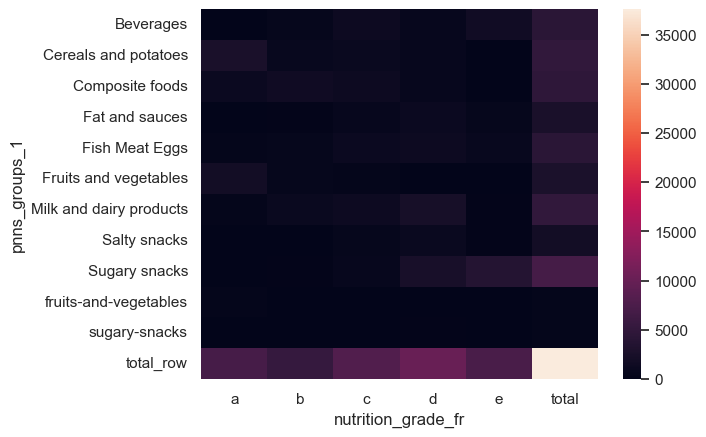

In [31]:
sns.heatmap(tab_contigence)

## 3. Analyse Mulvariée

In [32]:
cols = ['nutrition-score-fr_100g','energy_100g','fat_100g','saturated_fat_100g','carbohydrates_100g','fiber_100g','proteins_100g','salt_100g','sugars_100g']

In [33]:
df = df[cols]
df.isna().mean()

nutrition-score-fr_100g    0.0
energy_100g                0.0
fat_100g                   0.0
saturated_fat_100g         0.0
carbohydrates_100g         0.0
fiber_100g                 0.0
proteins_100g              0.0
salt_100g                  0.0
sugars_100g                0.0
dtype: float64

In [34]:
names = df.index
names

RangeIndex(start=0, stop=37582, step=1)

In [35]:
features = df.columns
features
df

,nutrition-score-fr_100g,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
0,13.0,177.0,0.0,0.00,10.40,0.000,0.000,0.0254,10.40
1,13.0,177.0,0.0,0.00,10.40,0.100,0.000,0.1000,10.40
2,12.0,1900.0,23.0,2.50,55.00,1.500,6.000,0.6600,26.00
3,13.0,1768.0,19.0,2.50,56.00,1.800,5.800,0.6500,28.00
4,12.0,1670.0,15.0,2.00,60.00,1.500,4.900,0.6000,34.00
...,...,...,...,...,...,...,...,...,...
37577,4.0,1017.0,1.3,1.28,95.87,0.005,0.040,0.0050,0.12
37578,2.0,1031.0,1.3,1.28,95.31,1.470,0.004,0.0010,0.10
37579,9.0,2155.0,30.3,3.40,51.00,5.600,7.800,1.3500,1.80
37580,-4.0,1643.0,2.8,0.60,74.80,5.900,13.000,0.6800,2.60


In [36]:
np.cov(df['nutrition-score-fr_100g'],df['energy_100g'])[0][1]/(df['nutrition-score-fr_100g'].std()*df['energy_100g'].std())

0.625822031520943

In [37]:
df.corr().values

array([[ 1.        ,  0.62582203,  0.60085516,  0.61067802,  0.22847877,
        -0.11376596,  0.095268  ,  0.21291554,  0.468878  ],
       [ 0.62582203,  1.        ,  0.7729846 ,  0.6098535 ,  0.5480053 ,
         0.29756502,  0.23279854,  0.04608552,  0.35147429],
       [ 0.60085516,  0.7729846 ,  1.        ,  0.74993227, -0.02552146,
         0.0506625 ,  0.18413096,  0.12147663,  0.03767273],
       [ 0.61067802,  0.6098535 ,  0.74993227,  1.        , -0.02196815,
        -0.00852164,  0.17353154,  0.05236681,  0.10499329],
       [ 0.22847877,  0.5480053 , -0.02552146, -0.02196815,  1.        ,
         0.36514592, -0.12184971, -0.16282881,  0.61178405],
       [-0.11376596,  0.29756502,  0.0506625 , -0.00852164,  0.36514592,
         1.        ,  0.09783878, -0.08496804,  0.10067044],
       [ 0.095268  ,  0.23279854,  0.18413096,  0.17353154, -0.12184971,
         0.09783878,  1.        ,  0.32554806, -0.28010477],
       [ 0.21291554,  0.04608552,  0.12147663,  0.05236681, -0

In [38]:
# Standardidation des données

scaler = StandardScaler()

In [39]:
X = df.values
scaler.fit(X)
df.values.shape

(37582, 9)

In [40]:
X_scaled = scaler.transform(X)
X_scaled.shape

(37582, 9)

In [41]:
X_scaled_df = pd.DataFrame(X_scaled)
corr =X_scaled_df.corr()
corr.values

array([[ 1.        ,  0.62582203,  0.60085516,  0.61067802,  0.22847877,
        -0.11376596,  0.095268  ,  0.21291554,  0.468878  ],
       [ 0.62582203,  1.        ,  0.7729846 ,  0.6098535 ,  0.5480053 ,
         0.29756502,  0.23279854,  0.04608552,  0.35147429],
       [ 0.60085516,  0.7729846 ,  1.        ,  0.74993227, -0.02552146,
         0.0506625 ,  0.18413096,  0.12147663,  0.03767273],
       [ 0.61067802,  0.6098535 ,  0.74993227,  1.        , -0.02196815,
        -0.00852164,  0.17353154,  0.05236681,  0.10499329],
       [ 0.22847877,  0.5480053 , -0.02552146, -0.02196815,  1.        ,
         0.36514592, -0.12184971, -0.16282881,  0.61178405],
       [-0.11376596,  0.29756502,  0.0506625 , -0.00852164,  0.36514592,
         1.        ,  0.09783878, -0.08496804,  0.10067044],
       [ 0.095268  ,  0.23279854,  0.18413096,  0.17353154, -0.12184971,
         0.09783878,  1.        ,  0.32554806, -0.28010477],
       [ 0.21291554,  0.04608552,  0.12147663,  0.05236681, -0

In [42]:
# récupère les vecteurs propres et valeurs propres

eigenvalues,eigenvectors = np.linalg.eig(corr.values)
eigenvectors

array([[-0.45485005, -0.05156408, -0.27559435,  0.28848471, -0.01789321,
        -0.71210648, -0.19899738,  0.28932251,  0.02352902],
       [-0.51375576,  0.05943135,  0.18069799, -0.06998897,  0.7186346 ,
         0.08786352, -0.13440405, -0.38952597,  0.0319701 ],
       [-0.45139   , -0.25569414, -0.06847432, -0.2936852 , -0.53627347,
         0.26248475, -0.45309144, -0.21148692, -0.18281625],
       [-0.42719774, -0.23260519, -0.17177521, -0.29241277, -0.01633423,
         0.11960414,  0.76085026,  0.23333634, -0.02177259],
       [-0.23361429,  0.52899385,  0.2312986 ,  0.23582098, -0.42582625,
        -0.15576967,  0.33737463, -0.47439957,  0.10959248],
       [-0.10393766,  0.24880089,  0.67827428, -0.26765238, -0.02316441,
        -0.13445308, -0.06187102,  0.45237598, -0.4105058 ],
       [-0.11053957, -0.37811362,  0.50940471,  0.16519756, -0.11578536,
         0.07751395, -0.0465481 ,  0.17307453,  0.71168218],
       [-0.0591573 , -0.3823075 ,  0.18716916,  0.70310142,  0

In [43]:
eigenvalues

array([3.27520302, 2.00844121, 1.26419936, 0.9742032 , 0.02688063,
       0.18813484, 0.2553963 , 0.40743763, 0.6001038 ])

Text(0.5, 1.0, 'les valeurs propres en fonction des facteurs')

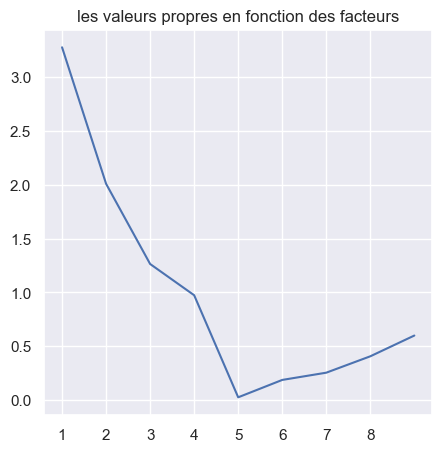

In [44]:
# Cette courbe montre clairement que la quantité d'inertie expliquée
# est netemment plus importante sur les premiers axes que sur les derniers

eigenvalues
fig, axes = plt.subplots(figsize = (5,5))
axes.set_xticks(np.arange(9))
axes.plot(range(1,10),eigenvalues)
plt.title("les valeurs propres en fonction des facteurs")

In [45]:
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.52038546, -1.17831258, -0.81071733, ..., -1.04711467,
        -0.57628838, -0.12478567],
       [ 0.52038546, -1.17831258, -0.81071733, ..., -1.04711467,
        -0.52450137, -0.12478567],
       [ 0.41090759,  1.06496904,  0.65095378, ..., -0.221409  ,
        -0.13575173,  0.73756292],
       ...,
       [ 0.08247399,  1.39696951,  1.11487548, ...,  0.0263027 ,
         0.34324336, -0.60018298],
       [-1.34073829,  0.73036464, -0.63277476, ...,  0.74191427,
        -0.12186782, -0.55595997],
       [-0.68387109, -1.38141875, -0.79800715, ..., -0.97830587,
        -0.57628838, -0.67204536]])

In [46]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7,8
mean,0.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [47]:
n_components = 5

In [48]:
pca = PCA(n_components=n_components)

In [49]:
pca.fit(X_scaled)

PCA(n_components=5)

In [50]:
pca.explained_variance_ratio_

array([0.36391145, 0.22316013, 0.1404666 , 0.1082448 , 0.0666782 ])

In [51]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree

array([36.39, 22.32, 14.05, 10.82,  6.67])

In [52]:
scree_cum = scree.cumsum().round()
scree_cum

array([36., 59., 73., 84., 90.])

In [53]:
x_list = range(1, n_components+1)
list(x_list)

[1, 2, 3, 4, 5]

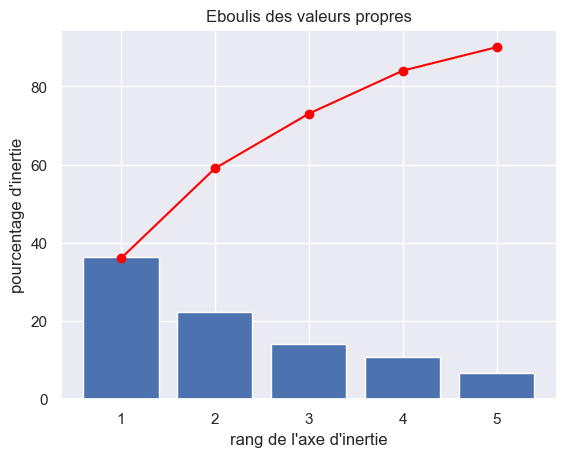

In [54]:
# ce graphique représente l'inertie totale sur les 5 axes principaux

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [55]:
# La méthode des "batons brisés" permet de selectionner les axes
# qui serait interessant pour l'interprétation des résultats de l'ACP
# elle propose de calculer un seuil théorique par axe et de comparer les inertie des axes avec ces seuils.

b_i = 1/np.arange(10,1,-1)
cumul_b_i = np.cumsum(b_i)
cumul_b_i = cumul_b_i[::-1]
pd.DataFrame({'val propre':eigenvalues,'Seuils':cumul_b_i})

,val propre,Seuils
0,3.275203,1.928968
1,2.008441,1.428968
2,1.264199,1.095635
3,0.974203,0.845635
4,0.026881,0.645635
5,0.188135,0.478968
6,0.255396,0.336111
7,0.407438,0.211111
8,0.600104,0.100000


In [56]:
pcs = pca.components_
pcs

array([[ 0.45485005,  0.51375576,  0.45139   ,  0.42719774,  0.23361429,
         0.10393766,  0.11053957,  0.0591573 ,  0.24863295],
       [ 0.05156408, -0.05943135,  0.25569414,  0.23260519, -0.52899385,
        -0.24880089,  0.37811362,  0.3823075 , -0.49341573],
       [-0.27559435,  0.18069799, -0.06847432, -0.17177521,  0.2312986 ,
         0.67827428,  0.50940471,  0.18716916, -0.22163041],
       [ 0.28848471, -0.06998897, -0.2936852 , -0.29241277,  0.23582098,
        -0.26765238,  0.16519756,  0.70310142,  0.30204423],
       [-0.02352902, -0.0319701 ,  0.18281625,  0.02177259, -0.10959248,
         0.4105058 , -0.71168218,  0.50955229, -0.13367081]])

In [57]:
pcs = pd.DataFrame(pcs)
pcs

,0,1,2,3,4,5,6,7,8
0,0.454850,0.513756,0.451390,0.427198,0.233614,0.103938,0.110540,0.059157,0.248633
1,0.051564,-0.059431,0.255694,0.232605,-0.528994,-0.248801,0.378114,0.382308,-0.493416
2,-0.275594,0.180698,-0.068474,-0.171775,0.231299,0.678274,0.509405,0.187169,-0.221630
3,0.288485,-0.069989,-0.293685,-0.292413,0.235821,-0.267652,0.165198,0.703101,0.302044
4,-0.023529,-0.031970,0.182816,0.021773,-0.109592,0.410506,-0.711682,0.509552,-0.133671


In [58]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,nutrition-score-fr_100g,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
F1,0.45,0.51,0.45,0.43,0.23,0.10,0.11,0.06,0.25
F2,0.05,-0.06,0.26,0.23,-0.53,-0.25,0.38,0.38,-0.49
F3,-0.28,0.18,-0.07,-0.17,0.23,0.68,0.51,0.19,-0.22
F4,0.29,-0.07,-0.29,-0.29,0.24,-0.27,0.17,0.70,0.30
F5,-0.02,-0.03,0.18,0.02,-0.11,0.41,-0.71,0.51,-0.13


In [59]:
pcs.T

,F1,F2,F3,F4,F5
nutrition-score-fr_100g,0.454850,0.051564,-0.275594,0.288485,-0.023529
energy_100g,0.513756,-0.059431,0.180698,-0.069989,-0.031970
fat_100g,0.451390,0.255694,-0.068474,-0.293685,0.182816
saturated_fat_100g,0.427198,0.232605,-0.171775,-0.292413,0.021773
carbohydrates_100g,0.233614,-0.528994,0.231299,0.235821,-0.109592
fiber_100g,0.103938,-0.248801,0.678274,-0.267652,0.410506
proteins_100g,0.110540,0.378114,0.509405,0.165198,-0.711682
salt_100g,0.059157,0.382308,0.187169,0.703101,0.509552
sugars_100g,0.248633,-0.493416,-0.221630,0.302044,-0.133671


In [60]:
# les vecteurs propres représente les variables sur les différents axes principaux de composantes

eigenvectors = -1*eigenvectors
eigenvectors

array([[ 0.45485005,  0.05156408,  0.27559435, -0.28848471,  0.01789321,
         0.71210648,  0.19899738, -0.28932251, -0.02352902],
       [ 0.51375576, -0.05943135, -0.18069799,  0.06998897, -0.7186346 ,
        -0.08786352,  0.13440405,  0.38952597, -0.0319701 ],
       [ 0.45139   ,  0.25569414,  0.06847432,  0.2936852 ,  0.53627347,
        -0.26248475,  0.45309144,  0.21148692,  0.18281625],
       [ 0.42719774,  0.23260519,  0.17177521,  0.29241277,  0.01633423,
        -0.11960414, -0.76085026, -0.23333634,  0.02177259],
       [ 0.23361429, -0.52899385, -0.2312986 , -0.23582098,  0.42582625,
         0.15576967, -0.33737463,  0.47439957, -0.10959248],
       [ 0.10393766, -0.24880089, -0.67827428,  0.26765238,  0.02316441,
         0.13445308,  0.06187102, -0.45237598,  0.4105058 ],
       [ 0.11053957,  0.37811362, -0.50940471, -0.16519756,  0.11578536,
        -0.07751395,  0.0465481 , -0.17307453, -0.71168218],
       [ 0.0591573 ,  0.3823075 , -0.18716916, -0.70310142, -0

<AxesSubplot:>

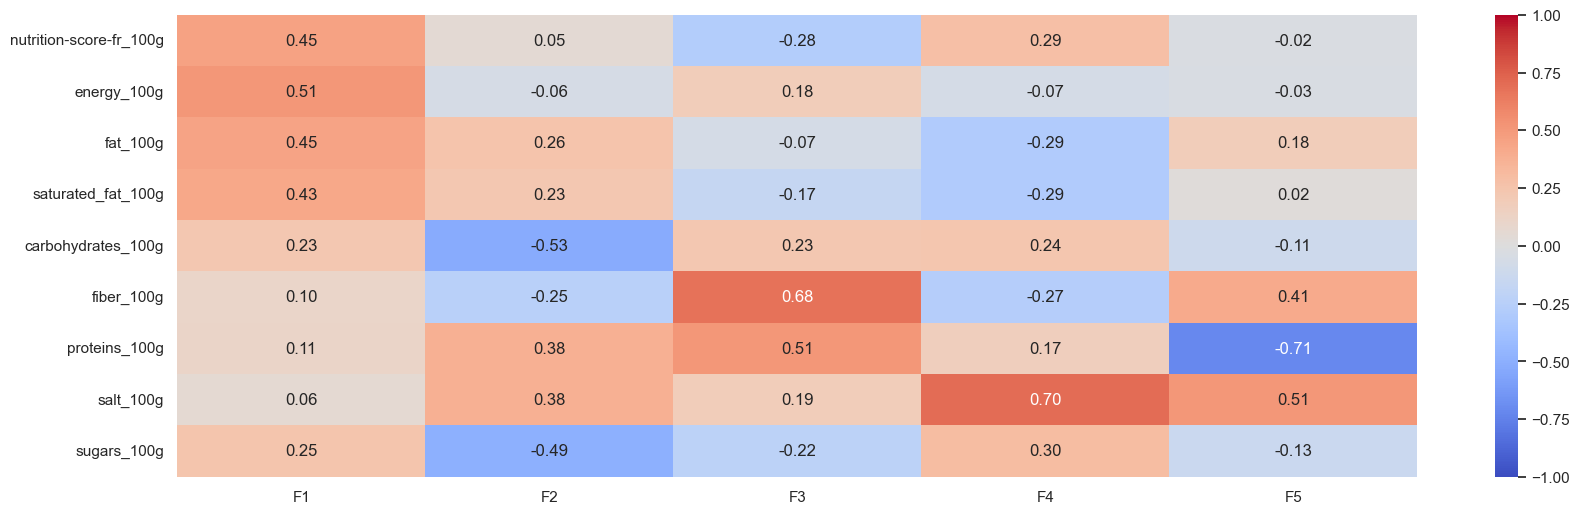

In [61]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

In [62]:
# Inertie des axes principaux

pca.explained_variance_/9

array([0.36392113, 0.22316607, 0.14047033, 0.10824768, 0.06667997])

In [63]:
x, y = 0,1

In [64]:
def cercle_corelation(pca,x,y):
    fig, ax = plt.subplots(figsize=(10, 9))
    for i in range(0, pca.components_.shape[1]):
        ax.arrow(0,
                 0,  # Start the arrow at the origin
                 pca.components_[x, i],  #0 for PC1
                 pca.components_[y, i],  #1 for PC2
                 head_width=0.07,
                 head_length=0.07, 
                 width=0.02,              )

        plt.text(pca.components_[0, i] + 0.05,
                 pca.components_[1, i] + 0.05,
                 features[i])

    # affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')


    # nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
    plt.axis('equal')
    plt.show(block=False)


In [65]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    # Taille de l'image (en inches)
    fig, ax = plt.subplots(figsize=(8, 7))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        #plt.text(pca.components_[x, i] + 0.05, pca.components_[y, i] + 0.05, fontsize='14', horizontalalignment='center',verticalalignment='center')
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    # J'ai copié collé le code sans le lire
    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    # Axes et display
    plt.axis('equal')
    plt.show(block=False)

In [66]:
X_proj = pca.transform(X_scaled)
X_proj.shape
pcs_pi = pd.DataFrame(X_proj,columns=pcs.index)
pcs_pi[pcs_pi['F1']>1]

,F1,F2,F3,F4,F5
2,1.254104,-0.951707,-0.100647,0.337632,-0.134211
3,1.143313,-1.111423,-0.111976,0.463435,-0.141964
5,2.295160,-0.898503,-0.590996,0.547950,-0.427766
6,2.343459,-0.806407,-0.365915,0.532061,-0.224022
7,1.070165,-1.224330,-0.364459,0.601769,-0.210908
...,...,...,...,...,...
37548,3.654863,0.806244,-0.897641,-1.475486,0.189080
37549,1.908816,3.194918,0.834235,-0.035547,-1.996595
37554,7.698345,3.838769,-2.855465,-5.194769,1.394348
37575,5.324086,2.519682,-1.905383,-3.499910,1.267395


In [67]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[8,7], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            print(labels[i])
            plt.text(_x, _y+0.05, labels[i], fontsize='14', horizontalalignment='center',verticalalignment='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()



In [68]:
# Après la réduction de dimensionalité pour 5 ACP, les variables ont perdu de leur information. 

X_scaled2 = pca.inverse_transform(X_proj)
pd.DataFrame(scaler.inverse_transform(X_scaled2),columns=df.select_dtypes(include=np.number).columns)

,nutrition-score-fr_100g,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
0,5.945256,341.793812,3.020028,1.565397,14.258708,-1.015742,-0.143728,0.350568,14.911120
1,5.964686,345.564125,3.063267,1.506238,14.382769,-0.928703,-0.160465,0.423255,14.766562
2,14.180765,1591.518768,15.997560,7.210367,50.592448,2.603493,6.728143,0.654613,29.365899
3,14.006917,1546.946203,13.976557,6.223636,52.929666,2.551416,6.349497,0.675884,31.044748
4,14.005539,1470.962739,10.469188,4.695927,57.503265,2.231763,5.313370,0.565006,35.213508
...,...,...,...,...,...,...,...,...,...
37577,5.796911,909.108071,0.145049,-0.567512,49.970364,2.740728,2.889425,-0.097398,27.770061
37578,4.058603,952.050899,0.401717,-0.978774,51.818449,4.039325,2.630349,-0.120259,25.588254
37579,9.313101,1810.853187,24.080367,8.872720,41.807788,6.872751,9.026953,1.437814,10.943394
37580,0.390491,1356.809520,3.195563,-0.970781,56.259812,7.616319,14.543520,0.468835,12.227149


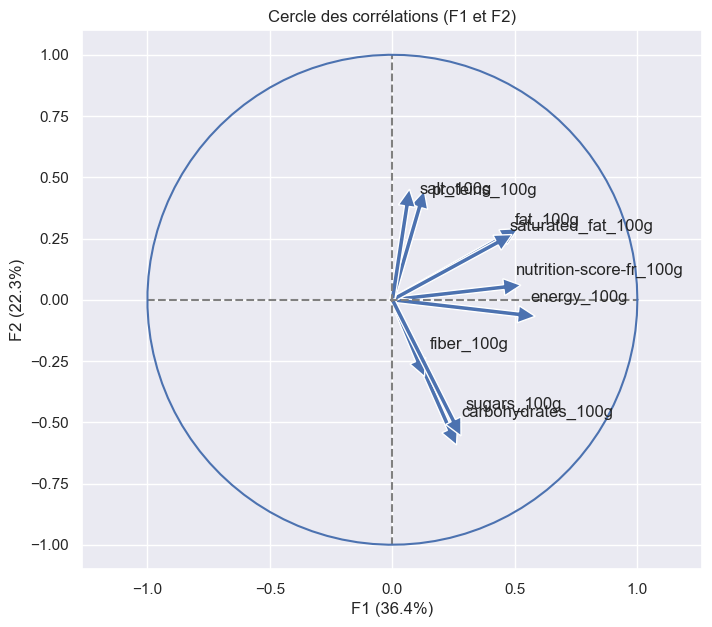

In [69]:
# les variables energy, fat et saturated fat sont liés. En effet, plsu l'aliment est gras plus il aura de l'energier. 

x, y = 0,1

correlation_graph(pca,(x,y),features)

In [70]:
df2 = pd.DataFrame(X_proj,columns=['F1','F2','F3','F4','F5'])
df2['pnns_groups1'] = data['pnns_groups_1']
df2['nutrition_grade_fr'] = data['nutrition_grade_fr']

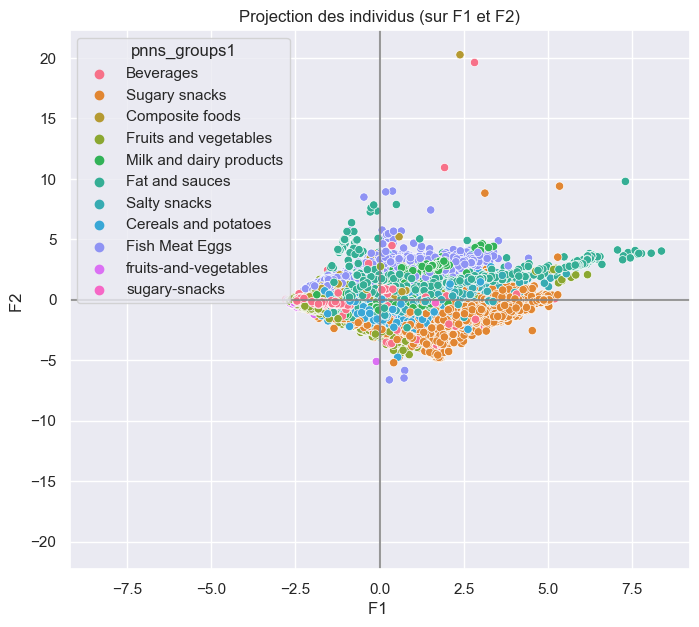

In [71]:
display_factorial_planes(df2,(0,1),clusters = df2['pnns_groups1'])

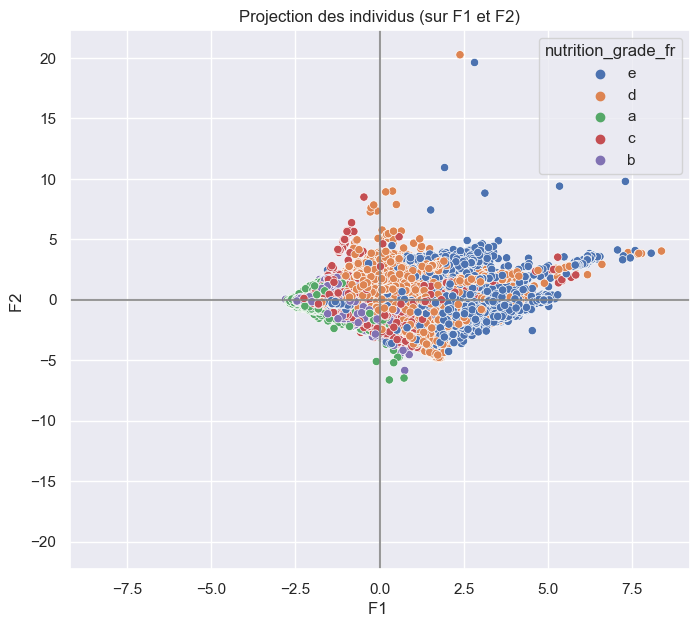

In [72]:
display_factorial_planes(df2,(0,1),clusters = df2['nutrition_grade_fr'])

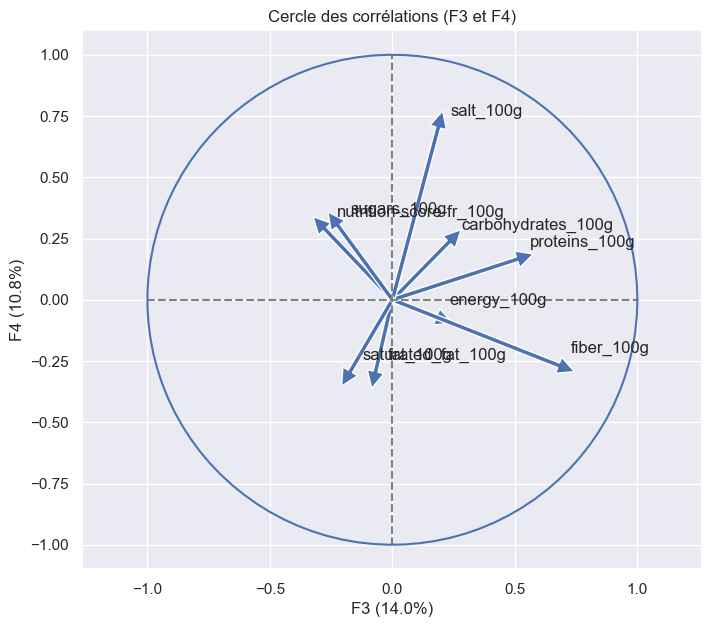

In [73]:
x, y = 2,3
correlation_graph(pca,(x,y),features)

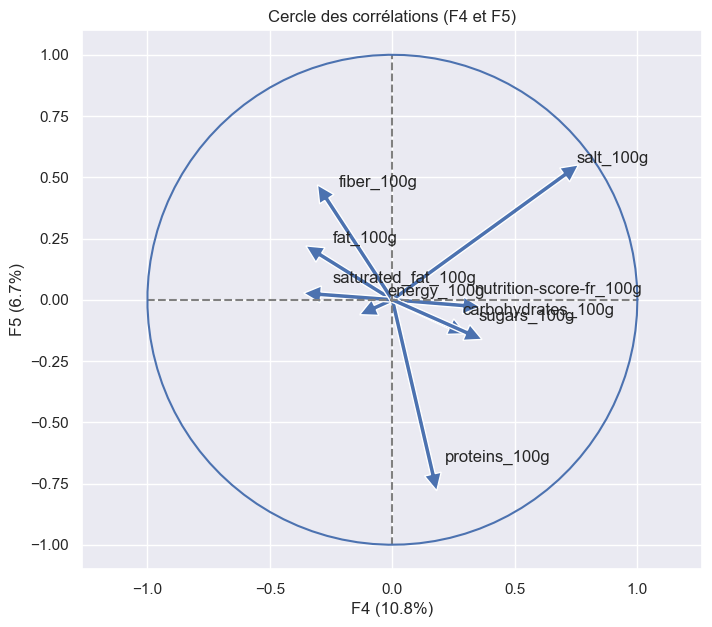

In [74]:
x, y = 3,4
correlation_graph(pca,(x,y),features)

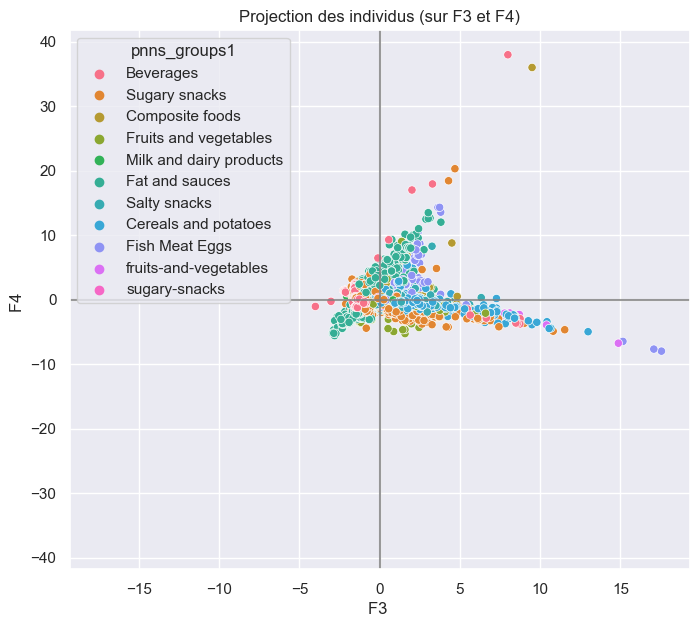

In [75]:
display_factorial_planes(df2,(2,3),clusters = df2['pnns_groups1'])

In [76]:
# Calcul de la qualité de la représentation des individus. 
# Plus la valeur est élevé (se rapproche de 1) mieux l'individu est représenté sur cette axe.

total_dist = np.sum(X_proj **2,axis=1)
cos2 = X_proj**2
for j in range(X_proj.shape[1]):
    cos2[:,j] = cos2[:,j]/total_dist

QLTI = pd.DataFrame({'COS2_1':cos2[:,0], 'COS2_2':cos2[:,1], 'COS2_3':cos2[:,2],'COS2_4':cos2[:,3],'COS2_5':cos2[:,4]})
QLTI.head()

,COS2_1,COS2_2,COS2_3,COS2_4,COS2_5
0,0.487046,0.025606,0.481978,0.001350,0.004019
1,0.494184,0.024298,0.471850,0.002630,0.007038
2,0.600145,0.345617,0.003865,0.043499,0.006873
3,0.468536,0.442763,0.004494,0.076982,0.007224
4,0.263334,0.591626,0.017130,0.115584,0.012326


In [77]:
QLTI[QLTI['COS2_1']> 0.7]

,COS2_1,COS2_2,COS2_3,COS2_4,COS2_5
5,0.762606,0.116873,0.050564,0.043467,2.649026e-02
6,0.830925,0.098391,0.020258,0.042832,7.593271e-03
8,0.885222,0.029000,0.067858,0.017920,2.850911e-07
9,0.817337,0.172721,0.003802,0.005896,2.444095e-04
10,0.902072,0.057080,0.008944,0.022627,9.277324e-03
...,...,...,...,...,...
37560,0.734728,0.011065,0.007742,0.239369,7.096467e-03
37564,0.836257,0.001509,0.105332,0.046864,1.003901e-02
37571,0.815232,0.005250,0.147571,0.031944,2.520226e-06
37576,0.747742,0.026711,0.200340,0.017405,7.802279e-03


In [78]:
# calcul de la contribution des individu. formule : (vi*Pi*Pi*vi) / eigenvalue
# (vi*PI*PI*vi) est la distance entre l'origine et l'image du point i par projection sur l'axe de la conposante principale
# eigenvalue est l'inertie du nuage de point projeté sur la composante principe i (eigenvalue)

n = X_proj.shape[0]
p = X_proj.shape[1]
ctr = X_proj**2

for j in range(p):
    ctr[:,j] = ctr[:,j]/(eigenvalues[j])

CTR = pd.DataFrame({'CTR_1':ctr[:,0],'CTR_2':ctr[:,1],'CTR_3':ctr[:,2],'CTR_4':ctr[:,3],'CTR_5':ctr[:,4]})
CTR

,CTR_1,CTR_2,CTR_3,CTR_4,CTR_5
0,0.601796,0.051595,1.542870,0.005610,0.605083
1,0.596390,0.047819,1.475258,0.010669,1.034832
2,0.480208,0.450970,0.008013,0.117014,0.670099
3,0.399109,0.615034,0.009918,0.220459,0.749755
4,0.292570,1.071886,0.049305,0.431725,1.668592
...,...,...,...,...,...
37577,0.105950,1.572643,0.008052,0.044587,0.803592
37578,0.124055,1.788405,0.056172,0.000177,0.095056
37579,0.559172,0.011030,1.438949,0.128311,20.384558
37580,0.026054,0.632113,4.307653,0.014280,4.351108


In [79]:
# calcul de la représentation des variables. formule : eigenvectors[i]*sqrt(eigenvalues[i]) 

sqrt_eigenvalues = np.sqrt(eigenvalues)
corvar = np.zeros((9,5))
corvar
for i in range(5): corvar[:,i] = pca.components_[i,:]*sqrt_eigenvalues[i]

    
cos2_var = corvar**2

pd.DataFrame({'COR_1':cos2_var[:,0],'COR_2' : cos2_var[:,1],'COR_3' : cos2_var[:,2],'COR_4' : cos2_var[:,3],'COR_5' : cos2_var[:,4]})

,COR_1,COR_2,COR_3,COR_4,COR_5
0,0.677602,0.005340,0.096019,0.081077,0.000015
1,0.864473,0.007094,0.041278,0.004772,0.000027
2,0.667332,0.131311,0.005927,0.084026,0.000898
3,0.597718,0.108667,0.037302,0.083299,0.000013
4,0.178746,0.562031,0.067633,0.054177,0.000323
5,0.035382,0.124326,0.581603,0.069790,0.004530
6,0.040020,0.287147,0.328051,0.026586,0.013615
7,0.011462,0.293552,0.044288,0.481599,0.006979
8,0.202468,0.488973,0.062098,0.088877,0.000480


In [80]:
# Calcul de la contribution des variables. formule : vi*Pi*Pi*vi/eigenvalue

ctrvar = cos2_var

for i in range(5): ctrvar[:,i] = ctrvar[:,i]/eigenvalues[i]


pd.DataFrame({'CTR_1':ctrvar[:,0],'CTR_2' : ctrvar[:,1],'CTR_3' : ctrvar[:,2],'CTR_4' : ctrvar[:,3],'CTR_5' : ctrvar[:,4]})

,CTR_1,CTR_2,CTR_3,CTR_4,CTR_5
0,0.206889,0.002659,0.075952,0.083223,0.000554
1,0.263945,0.003532,0.032652,0.004898,0.001022
2,0.203753,0.065379,0.004689,0.086251,0.033422
3,0.182498,0.054105,0.029507,0.085505,0.000474
4,0.054576,0.279834,0.053499,0.055612,0.012011
5,0.010803,0.061902,0.460056,0.071638,0.168515
6,0.012219,0.142970,0.259493,0.027290,0.506492
7,0.003500,0.146159,0.035032,0.494352,0.259644
8,0.061818,0.243459,0.049120,0.091231,0.017868


In [81]:
from sklearn.cluster import KMeans

In [82]:
model = KMeans(n_clusters=3)
model

KMeans(n_clusters=3)

In [83]:
# X_scaled enregistre la variable X_proj. cell-ci à pour rôle de reduire la dimension des individues représenté par les variables.

X_scaled2 = X_proj
X_scaled2

array([[-1.40392447, -0.32190847, -1.39660155,  0.07392572,  0.12753432],
       [-1.3976044 , -0.30990512, -1.36565754,  0.10195139,  0.16678411],
       [ 1.25410437, -0.95170729, -0.10064747,  0.33763237, -0.13421137],
       ...,
       [ 1.35329317, -0.14883915,  1.34874694, -0.35355441,  0.74023629],
       [-0.2921152 , -1.12674815,  2.33360929, -0.11794594, -0.34199494],
       [-2.24748937,  0.11122982, -0.9923529 , -0.52719108,  0.25527479]])

In [84]:
k  = range(1,30)
inertia = []
for i in k:
    model = KMeans(n_clusters=i)
    model.fit(X_scaled2)
    inertia.append(model.inertia_)
inertia

[305246.66344776493,
 214332.02980787246,
 170813.5476824778,
 144595.65621078326,
 123783.31301413623,
 111758.3033758539,
 100001.96411879228,
 89721.06890087822,
 82420.242448777,
 76025.06660067411,
 71011.11380146095,
 66722.19101629328,
 62893.10374291495,
 59446.40124852339,
 56757.124506549386,
 53540.46084276654,
 50853.3762773872,
 48765.92191003929,
 46548.79118548511,
 45637.080402252206,
 43432.34425594674,
 42089.59081412396,
 40685.95196004656,
 39349.34140498003,
 38193.13612754447,
 37407.271255250045,
 36213.780233395555,
 35571.75815548553,
 34581.47175059249]

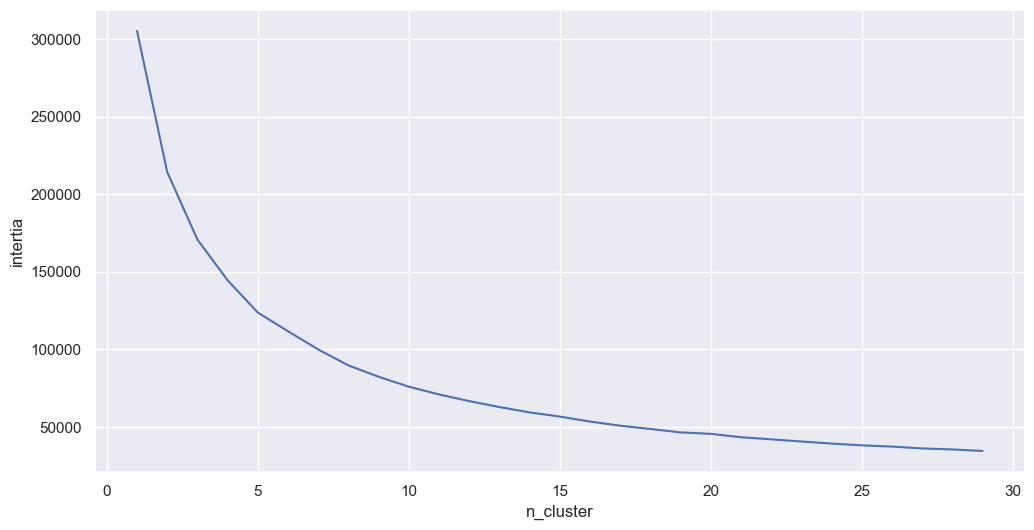

In [85]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k, inertia)

In [86]:
# Création de 8 clusters avec Kmeans

k  = range(1,9)
inertia = []
clust_centers = []
for i in k:
    model = KMeans(n_clusters=i)
    model.fit(X_scaled2)
    inertia.append(model.inertia_)
    clust_centers.append(model.cluster_centers_)
inertia


[305246.66344776493,
 214332.2526861021,
 170813.5178303984,
 144594.78257768357,
 123783.2886705169,
 111758.2990203377,
 100002.76886856667,
 89721.1941578339]

In [87]:
model.predict(X_scaled2)

array([1, 1, 0, ..., 5, 5, 1])

In [88]:
model.labels_

array([1, 1, 0, ..., 5, 5, 1])

In [89]:
model.cluster_centers_

array([[ 2.41159716, -0.79206264, -0.15708527,  0.12683245,  0.04095138],
       [-1.62404862, -0.07812833, -0.54678815, -0.27148645,  0.24552357],
       [ 0.08993353,  5.11724009,  1.93716179,  8.56304989,  5.58677175],
       [ 4.15787426,  1.9340156 , -1.25182877, -2.28278317,  1.16149712],
       [ 1.4167124 ,  2.13956446,  0.04208499,  0.0373938 , -0.39561402],
       [-0.07955513, -1.05244705,  1.85446273, -0.22756488, -0.03031969],
       [ 0.87025006, -2.78864192, -0.64640887,  1.18847329, -0.37715844],
       [-0.74847495,  1.30251332,  0.44553135,  0.4896521 , -0.54589812]])

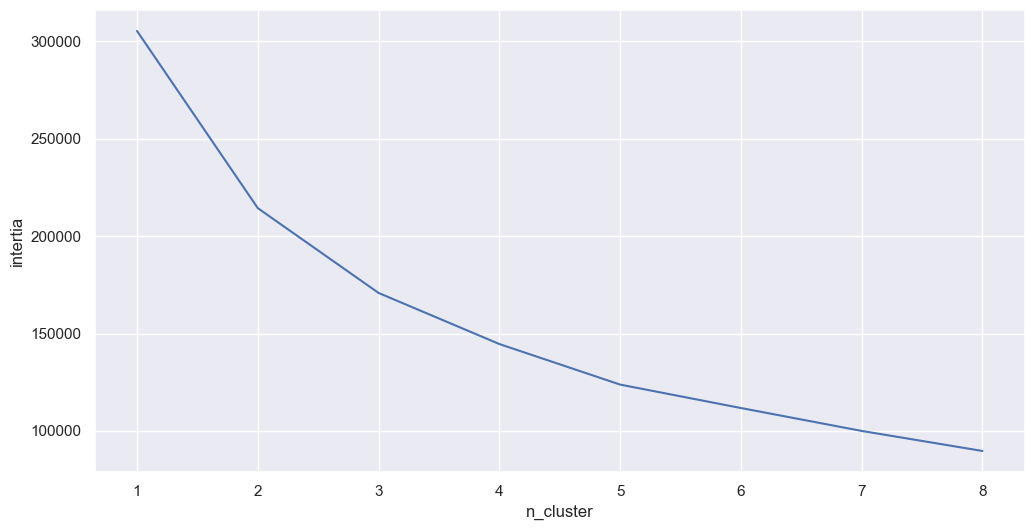

In [90]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")
ax = plt.plot(k, inertia)

In [91]:
# Creation de 5 clusters avec Kmeans

k  = range(1,6)
inertia = []
for i in k:
    model = KMeans(n_clusters=i)
    model.fit(X_scaled2)
    inertia.append(model.inertia_)
inertia

[305246.66344776493,
 214332.2074050176,
 170813.5476824778,
 144595.44170827273,
 123783.21630690443]

In [92]:
X = pd.DataFrame({'F1':X_scaled2[:,0],'F2':X_scaled2[:,1],'F3':X_scaled2[:,2],'F4':X_scaled2[:,3],'F5':X_scaled2[:,4]})
X["cluster"] = model.labels_
X['cluster'].unique()

array([1, 3, 0, 2, 4])

In [93]:
X

,F1,F2,F3,F4,F5,cluster
0,-1.403924,-0.321908,-1.396602,0.073926,0.127534,1
1,-1.397604,-0.309905,-1.365658,0.101951,0.166784,1
2,1.254104,-0.951707,-0.100647,0.337632,-0.134211,3
3,1.143313,-1.111423,-0.111976,0.463435,-0.141964,3
4,0.978890,-1.467249,-0.249662,0.648527,-0.211785,3
...,...,...,...,...,...,...
37577,-0.589073,-1.777234,-0.100891,0.208416,-0.146973,1
37578,-0.637422,-1.895233,0.266481,0.013130,0.050549,2
37579,1.353293,-0.148839,1.348747,-0.353554,0.740236,2
37580,-0.292115,-1.126748,2.333609,-0.117946,-0.341995,2


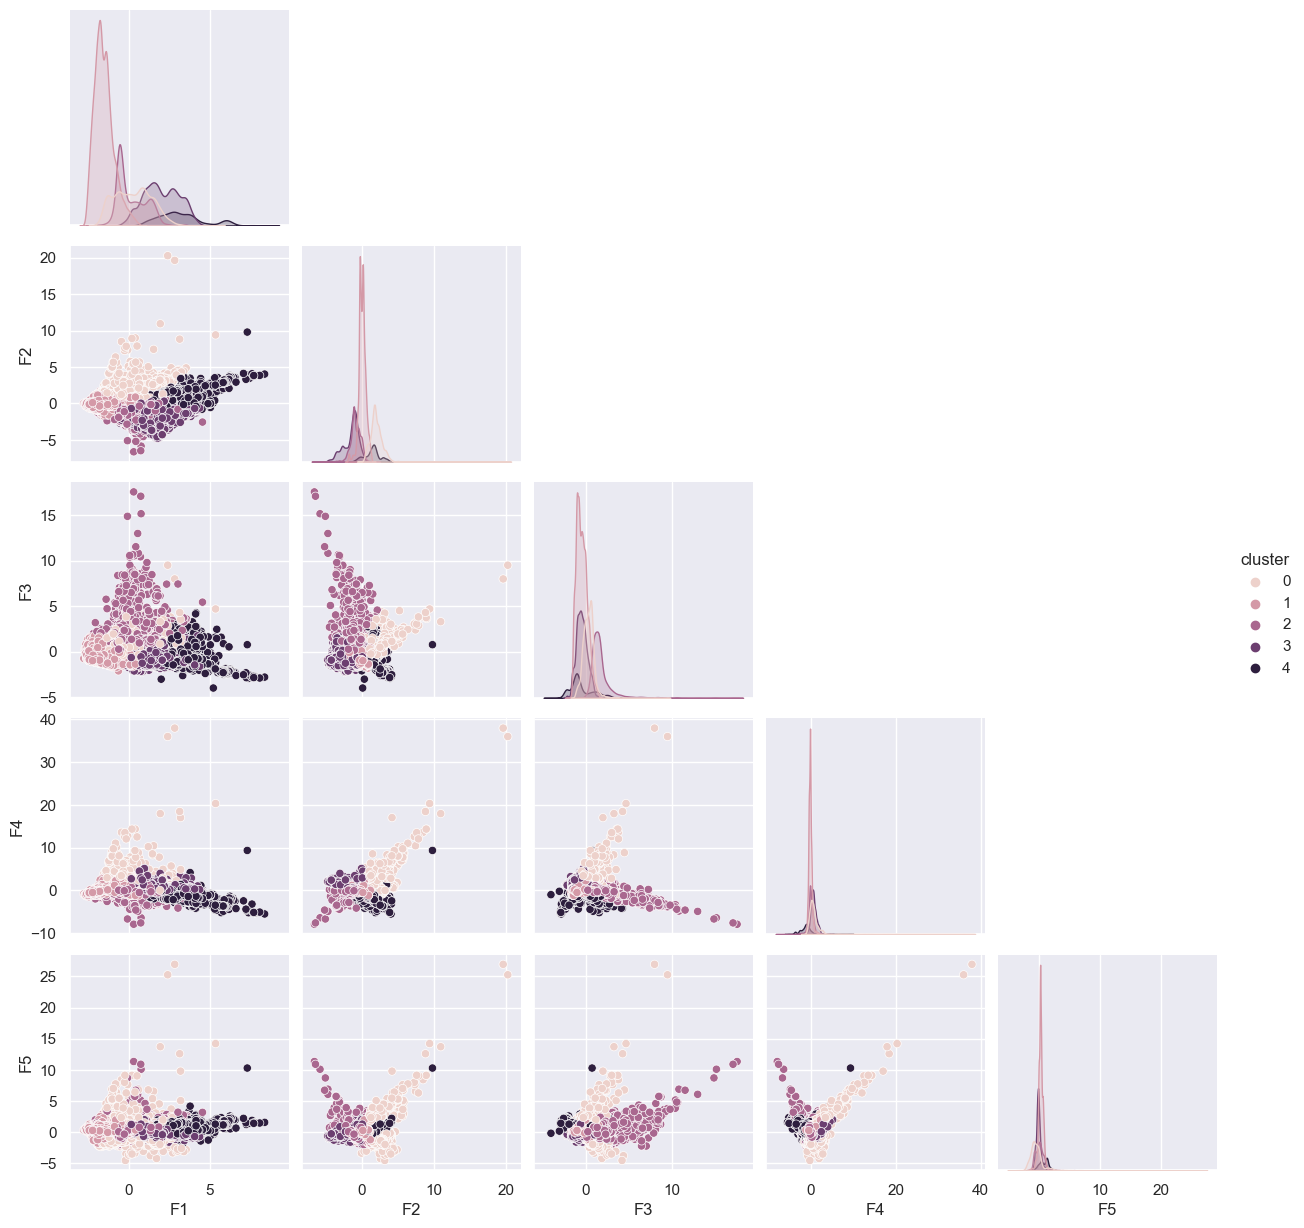

In [94]:
sns.pairplot(X , hue = 'cluster',corner = True)

<AxesSubplot:xlabel='F1', ylabel='F2'>

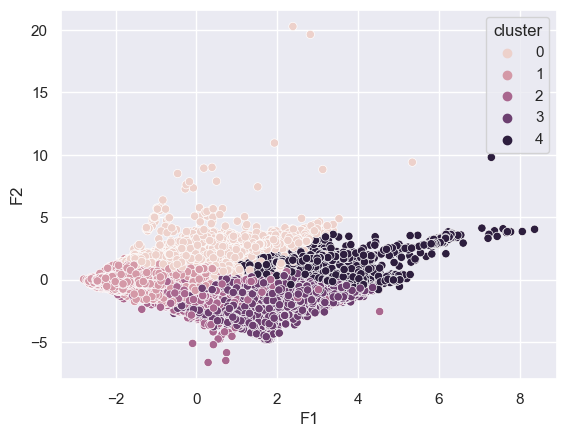

In [95]:
sns.scatterplot(data =  X, x='F1', y = 'F2', hue = 'cluster' )

In [96]:
# cluster 0

index0 = X[X['cluster'] == 0].index
data.loc[index0][0:40]

,url,pnns_groups_1,product_name,countries_tags,ingredients_text,additives_fr,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
15,http://world-fr.openfoodfacts.org/produit/0007...,Milk and dairy products,Mild Cheddar with Onions & Chives,"en:france,en:united-kingdom",_Fromage_ cheddar jeune (_Lait_) (94%) . Oigno...,NaN,d,14.0,1618.0,32.900,19.700,1.40,0.80,21.70,1.5300,0.40
19,http://world-fr.openfoodfacts.org/produit/0011...,Fat and sauces,Tabasco Green Pepper Sauce,"en:belgium,en:france","Vinaigre, piment jalapeÃ±o (30%), eau, sel, am...","E14XX - Amidons modifiÃ©s,E415 - Gomme xanthan...",c,9.0,46.0,0.000,0.000,1.80,1.20,0.60,7.4000,0.00
37,http://world-fr.openfoodfacts.org/produit/0014...,Fruits and vegetables,Pistachios,en:france,"Pistaches, sel",NaN,c,8.0,2469.0,46.000,5.600,27.70,1.90,21.40,1.3000,7.80
38,http://world-fr.openfoodfacts.org/produit/0014...,Salty snacks,Pistaches grillÃ©es sans sel Wonderful,en:france,Pistaches (100%).,NaN,c,3.0,2469.0,46.000,5.600,17.40,4.20,21.40,0.0000,7.80
39,http://world-fr.openfoodfacts.org/produit/0014...,Salty snacks,Pistachios salt & pepper,en:france,"pistaches 96%, sel 2%, poivre, sucre, poudre d...",NaN,e,23.0,2444.0,46.000,5.600,17.40,4.20,21.40,2.5000,7.80
40,http://world-fr.openfoodfacts.org/produit/0014...,Salty snacks,Pistaches au piment doux,en:france,NaN,NaN,e,24.0,2390.0,45.200,5.800,17.30,0.00,20.00,2.4003,10.30
42,http://world-fr.openfoodfacts.org/produit/0014...,Salty snacks,Pistaches XXL Poivre & Sel,en:france,"_Pistaches_ (96%), sel (2,5%), poivre (0,5%), ...",NaN,e,23.0,2444.0,46.000,5.600,17.40,4.20,21.40,2.5000,7.80
69,http://world-fr.openfoodfacts.org/produit/0020...,Composite foods,Pizza au thon,en:france,"Garniture (53,8%) : purÃ©e de tomates (34,5%),...",E160c - Extrait de paprika,c,9.0,1052.0,13.500,3.200,21.70,1.90,9.90,1.2000,3.20
92,http://world-fr.openfoodfacts.org/produit/0031...,Fish Meat Eggs,6 Pork & Bramley Apple Sausages,"en:france,en:united-kingdom",Porc d'origine britannique Ã©levÃ© en plein ai...,"E300 - Acide ascorbique,E450 - Sels mÃ©talliqu...",d,14.0,1023.0,19.200,7.000,5.50,1.00,12.40,1.1800,5.60
95,http://world-fr.openfoodfacts.org/produit/0033...,Composite foods,Chili Beef Nachos,"en:france,en:united-kingdom",Chips tortillas (37%) (FÃ©cule de maÃ¯s - Huil...,NaN,d,13.0,1389.0,19.300,9.100,29.30,2.50,9.20,0.8800,1.30


In [97]:
# cluster 0 : Pour ce groupe,les aliments contienent :
# peu de matière grasse et d'acide gras saturé, assez de proteine, assez de sucré, peu salé et beaucoup de glucide

data.loc[index0].mean()

C:\Users\Dragomir\AppData\Local\Temp\ipykernel_36932\1802731551.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.loc[index0].mean()


nutrition-score-fr_100g      11.957928
energy_100g                1042.695938
fat_100g                     17.121963
saturated_fat_100g            7.996898
carbohydrates_100g            5.068389
fiber_100g                    0.467111
proteins_100g                17.966485
salt_100g                     2.252943
sugars_100g                   1.487438
dtype: float64

In [98]:
# cluster 1

index1 = X[X['cluster'] == 1].index
data.loc[index1][1100:1140]

,url,pnns_groups_1,product_name,countries_tags,ingredients_text,additives_fr,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
2823,http://world-fr.openfoodfacts.org/produit/3017...,Composite foods,Lapin Sauce aux CÃ¨pes,en:france,"PurÃ©e 45% (eau, flocons de pomme de terre (po...",E471 - Mono- et diglycÃ©rides d'acides gras al...,b,2.0,395.0,4.300,2.5,6.6,1.7,6.8,0.7300,1.4
2825,http://world-fr.openfoodfacts.org/produit/3017...,Fruits and vegetables,Flageolets Carottes Champignons,en:france,MÃ©langes de lÃ©gumes : Flageolets (54% minimu...,E509 - Chlorure de calcium,a,-10.0,318.0,0.600,0.0,10.2,5.3,4.7,0.5588,1.1
2826,http://world-fr.openfoodfacts.org/produit/3017...,Fruits and vegetables,Duo Haricots verts Pommes de terre,en:france,"Haricots verts extra ï¬ns coupÃ©s (47%), eau,...",E223 - Disulfite de sodium,a,-6.0,123.0,0.000,0.0,4.7,2.6,1.3,0.6600,0.7
2827,http://world-fr.openfoodfacts.org/produit/3017...,fruits-and-vegetables,Duo Haricots verts Champignons,en:france,"Haricots verts extra fins coupÃ©s (51%), eau, ...",NaN,a,-6.0,111.0,0.600,0.0,2.2,2.8,1.7,0.9000,0.8
2828,http://world-fr.openfoodfacts.org/produit/3017...,Fruits and vegetables,Pommes de Terre Ã la Sarladaise,en:france,Pommes de terre 65% (conservateur : disulfite ...,"E223 - Disulfite de sodium,E250 - Nitrite de s...",a,-2.0,414.0,5.700,2.1,9.3,1.1,2.1,0.6858,1.8
2829,http://world-fr.openfoodfacts.org/produit/3017...,Fruits and vegetables,Les petits pois,en:france,"Petits pois, eau, sucre de canne, sel de mer.",NaN,a,-10.0,358.0,0.800,0.0,12.0,4.5,5.2,0.6000,3.3
2830,http://world-fr.openfoodfacts.org/produit/3017...,Fruits and vegetables,Les Haricots Verts,en:france,"Haricots verts, eau, sel de mer.",NaN,a,-6.0,108.0,0.200,0.0,3.0,2.8,1.6,0.6350,0.8
2831,http://world-fr.openfoodfacts.org/produit/3017...,Fruits and vegetables,Les tomates pelÃ©es Bio,en:france,"Tomates entiÃ¨res pelÃ©es bio, jus de tomates ...",E330 - Acide citrique,a,-5.0,77.0,0.400,0.2,2.1,1.0,1.1,0.3000,2.1
2832,http://world-fr.openfoodfacts.org/produit/3017...,Composite foods,Joue de porc Ã la ProvenÃ§ale & ses pommes de...,en:france,"Pommes de terre 25% (pomme de terre, antioxyda...","E300 - Acide ascorbique,E223 - Disulfite de so...",a,-1.0,306.0,2.200,0.7,7.2,1.5,5.3,1.0000,2.5
2833,http://world-fr.openfoodfacts.org/produit/3017...,Composite foods,PoÃªlÃ©e Haricots verts au beurre persillÃ©,en:france,"Haricots verts extra fins coupÃ©s, eau, _beurr...","E300 - Acide ascorbique,E415 - Gomme xanthane,...",a,-4.0,184.0,1.700,0.9,3.4,3.9,1.9,0.6000,1.5


In [99]:
# cluster 1 : Pour ce groupe,les aliments contienent :
# peu de matière grasse et d'acide gras saturé, peu de proteine, assez sucré, peu salé et assez de glucide

data.loc[index1].mean()

C:\Users\Dragomir\AppData\Local\Temp\ipykernel_36932\2736255002.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.loc[index1].mean()


nutrition-score-fr_100g      2.441464
energy_100g                382.513819
fat_100g                     3.442283
saturated_fat_100g           1.241576
carbohydrates_100g          11.617663
fiber_100g                   1.169883
proteins_100g                3.356280
salt_100g                    0.473564
sugars_100g                  6.477267
dtype: float64

In [100]:
# Cluster 2 

index2 = X[X['cluster'] == 2].index
data.loc[index2][200:240]

,url,pnns_groups_1,product_name,countries_tags,ingredients_text,additives_fr,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
1513,http://world-fr.openfoodfacts.org/produit/2049...,Salty snacks,Hot & Spicy,en:france,"Flocons de pomme de terre 47% (pomme de terre,...","E223 - Disulfite de sodium,E471 - Mono- et dig...",c,10.0,2141.0,27.0,2.5,61.3,4.0,4.0,1.60,4.6
1514,http://world-fr.openfoodfacts.org/produit/2049...,Salty snacks,Chips GoÃ»t Bacon,en:france,"47% pommes de terre dÃ©shydratÃ©es, conservate...","E223 - Disulfite de sodium,E471 - Mono- et dig...",c,9.0,2138.0,27.0,2.5,62.0,4.0,4.0,1.15,5.0
1515,http://world-fr.openfoodfacts.org/produit/2050...,Cereals and potatoes,Riz long grain,en:france,Riz cru,NaN,b,0.0,1523.0,0.3,0.1,81.3,0.0,7.4,0.02,0.3
1516,http://world-fr.openfoodfacts.org/produit/2050...,Cereals and potatoes,Tortilla wraps plain XXL,en:france,"_farine de blÃ©_ 66%, eau, huile de colza, age...","E422 - GlycÃ©rol,E466 - CarboxymÃ©thylcellulos...",c,4.0,1399.0,8.0,0.9,54.2,4.0,9.3,1.30,1.3
1568,http://world-fr.openfoodfacts.org/produit/2056...,Cereals and potatoes,Soba noodles,en:france,"_blÃ©_ 71%, sarrasin 15%, eau, sel de cuisine",NaN,b,0.0,1507.0,1.0,0.4,70.5,4.0,14.6,0.43,0.4
1619,http://world-fr.openfoodfacts.org/produit/2060...,Cereals and potatoes,Riz Basmati sachet cuisson,en:france,Riz Basmati long grain de qualitÃ© supÃ©rieure,NaN,b,0.0,1485.0,0.6,0.1,78.0,0.0,7.4,0.01,0.3
1620,http://world-fr.openfoodfacts.org/produit/2060...,Cereals and potatoes,Lentilles vertes,en:france,Lentilles vertes crues,NaN,a,-2.0,1292.0,1.1,0.2,37.0,4.0,25.8,0.02,2.0
1638,http://world-fr.openfoodfacts.org/produit/2062...,Cereals and potatoes,PÃ©tales de blÃ© Chocolat,en:france,"_blÃ©_ complet 48%, riz 32%, chocolat 18% (suc...",E322 - LÃ©cithines,c,10.0,1715.0,7.7,4.5,74.4,6.9,6.5,0.90,17.9
1639,http://world-fr.openfoodfacts.org/produit/2062...,Cereals and potatoes,PÃ©tales de BlÃ© fruits rouges,en:france,"51% _blÃ©_ complet, 36% riz, sucre, 5% fruits ...",NaN,b,0.0,1657.0,1.6,0.5,85.0,7.0,6.9,0.65,13.9
1640,http://world-fr.openfoodfacts.org/produit/2062...,Cereals and potatoes,Vitelle - Rice & wheat flakes,en:france,"_blÃ©_ complet 53%, riz 38%, sucre, sirop de s...",NaN,c,6.0,1594.0,1.5,0.5,81.1,6.2,6.5,1.13,17.0


In [101]:
# cluster 2 : Pour ce groupe, les aliments contienent :
# une quantité beaucoup de matière grassed et d'acide gras saturé, un peu de proteine, assez sucré et peu salé

data.loc[index2].mean()

C:\Users\Dragomir\AppData\Local\Temp\ipykernel_36932\3843395160.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.loc[index2].mean()


nutrition-score-fr_100g       2.507503
energy_100g                1574.756318
fat_100g                      9.206784
saturated_fat_100g            1.768906
carbohydrates_100g           60.012974
fiber_100g                    6.036426
proteins_100g                10.140761
salt_100g                     0.698016
sugars_100g                   7.507176
dtype: float64

In [102]:
# Cluster 3 

index3 = X[X['cluster'] == 3].index
data.loc[index3][100:173]

,url,pnns_groups_1,product_name,countries_tags,ingredients_text,additives_fr,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
429,http://world-fr.openfoodfacts.org/produit/1126...,Sugary snacks,Madeleines Amande,en:france,"_Åuf_, huile de palme non hydrogÃ©nÃ©e, sucre...","E412 - Gomme de guar,E322 - LÃ©cithines,E500 -...",e,25.0,2176.0,29.6,12.5,57.4,2.5,5.4,0.830000,29.5
444,http://world-fr.openfoodfacts.org/produit/1302...,Sugary snacks,Godis Julkola,en:france,"Sirop de glucose, sucre, _lait_ concentrÃ©, hu...",NaN,e,22.0,1800.0,9.8,5.5,79.0,2.5,3.4,0.550000,66.0
447,http://world-fr.openfoodfacts.org/produit/1302...,Sugary snacks,Marmelad Apelsin & FlÃ¤der,"en:france,en:united-kingdom","Sugar*, Orange Juice from concentrate* (20%), ...","E440 - Pectines,E330 - Acide citrique",d,12.0,1126.0,0.0,0.0,66.0,2.5,0.0,0.050038,62.0
448,http://world-fr.openfoodfacts.org/produit/1303...,Sugary snacks,Kakor hallon,en:france,NaN,NaN,e,25.0,1990.0,19.0,12.0,71.0,2.5,4.2,0.530000,37.0
453,http://world-fr.openfoodfacts.org/produit/1401...,Sugary snacks,KEX,en:france,"Farine complÃ¨te de blÃ©, sucre, huile vÃ©gÃ©t...","E500 - Carbonates de sodium,E322 - LÃ©cithines",d,16.0,1757.0,22.0,1.5,59.0,0.0,7.9,1.400000,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,http://world-fr.openfoodfacts.org/produit/2004...,Sugary snacks,Petit beurre,en:france,"72 % farine de _blÃ©_, sucre, 13 % beurre (_la...","E503 - Carbonates d'ammonium,E500 - Carbonates...",e,19.0,1866.0,12.0,7.5,75.0,2.5,7.5,0.600000,24.0
893,http://world-fr.openfoodfacts.org/produit/2004...,Salty snacks,Snack-Mix,en:france,"Farine de _blÃ©_, huile de palme, sel, sucre, ...","E14XX - Amidons modifiÃ©s,E524 - Hydroxyde de ...",e,23.0,1872.0,18.0,8.0,60.0,4.2,9.2,3.630000,5.6
910,http://world-fr.openfoodfacts.org/produit/2005...,Sugary snacks,Milch-Schokoladen-Streusel,en:france,"sucre, pÃ¢te de cacao, _lait_ entier en poudre...",E322 - LÃ©cithines,e,23.0,1905.0,14.6,8.9,72.7,2.5,6.0,0.100000,65.3
911,http://world-fr.openfoodfacts.org/produit/2005...,Sugary snacks,Gouters fourrÃ©s goÃ»t Vanille,en:france,NaN,NaN,e,22.0,2085.0,21.0,13.0,71.0,2.0,5.0,0.254000,36.0


In [103]:
# cluster 3 : Pour ce groupe, les aliments contienent :
# une quantité moyenne de matière grassed'acide gras, assez de proteine, peu sucré et salé

data.loc[index3].mean()

C:\Users\Dragomir\AppData\Local\Temp\ipykernel_36932\253953949.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.loc[index3].mean()


nutrition-score-fr_100g      18.682238
energy_100g                1809.109343
fat_100g                     18.025113
saturated_fat_100g            8.759629
carbohydrates_100g           60.879266
fiber_100g                    2.503870
proteins_100g                 5.168088
salt_100g                     0.477410
sugars_100g                  42.374718
dtype: float64

In [104]:
# cluster 4 : 

index4 = X[X['cluster'] == 4].index
data.loc[index4][200:240]

,url,pnns_groups_1,product_name,countries_tags,ingredients_text,additives_fr,nutrition_grade_fr,nutrition-score-fr_100g,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,fiber_100g,proteins_100g,salt_100g,sugars_100g
4464,http://world-fr.openfoodfacts.org/produit/3046...,Sugary snacks,Chocolat Noir 78% Tablette,en:france,"pÃ¢te de cacao, beurre de cacao, sucre, cacao ...",NaN,e,20.0,2428.0,48.0,29.0,22.0,2.5,9.2,0.030000,17.0
4472,http://world-fr.openfoodfacts.org/produit/3046...,Sugary snacks,Amazonia,en:france,"pÃ¢te de pur cacao fin d'Amazonie, sucre, beur...",NaN,e,24.0,2364.0,42.0,25.0,36.0,2.5,6.5,0.030000,33.0
4473,http://world-fr.openfoodfacts.org/produit/3046...,Sugary snacks,Amazonia,en:france,"pÃ¢te de pur cacao fin d'Amazonie, sucre, beur...",NaN,e,24.0,2364.0,42.0,25.0,36.0,2.5,6.5,0.030000,33.0
4474,http://world-fr.openfoodfacts.org/produit/3046...,Sugary snacks,Excellence 64% Cacao Satin Noir,en:france,"PÃ¢te de cacao, sucre, beurre de cacao, cacao ...",NaN,e,24.0,2356.0,41.0,25.0,38.0,2.5,6.1,0.030000,35.0
4482,http://world-fr.openfoodfacts.org/produit/3046...,Sugary snacks,A Cuisiner le 70% Cacao,en:france,"PÃ¢te de cacao, sucre, cacao maigre, beurre de...",E322 - LÃ©cithines,e,22.0,2205.0,37.0,22.0,34.0,2.5,8.5,0.100076,31.0
4500,http://world-fr.openfoodfacts.org/produit/3046...,Sugary snacks,Chocolat Noir 85% Cacao,"en:austria,en:france,en:germany,en:italy,en:ne...","pÃ¢te de cacao, cacao maigre, beurre de cacao,...",NaN,e,19.0,2413.0,46.0,28.0,19.0,2.5,12.5,0.020000,11.0
4501,http://world-fr.openfoodfacts.org/produit/3046...,Sugary snacks,Excellence 70% cacao Noir Intense,"en:france,en:switzerland","pÃ¢te de cacao, sucre, beurre de cacao, vanille.",NaN,e,23.0,2368.0,41.0,24.0,34.0,2.5,9.5,0.100000,29.0
4507,http://world-fr.openfoodfacts.org/produit/3046...,Sugary snacks,A cuisiner 70% Cacao,en:france,"PÃ¢te de cacao, sucre, cacao maigre, beurre de...",E322 - LÃ©cithines,e,22.0,2205.0,37.0,22.0,34.0,2.5,8.5,0.100000,31.0
4509,http://world-fr.openfoodfacts.org/produit/3046...,Sugary snacks,60% cacao doux Ã cuisiner,en:france,"PÃ¢te de cacao, sucre, beurre de cacao, vanill...",NaN,e,23.0,2350.0,40.0,24.0,34.0,2.5,9.5,0.100000,29.0
4510,http://world-fr.openfoodfacts.org/produit/3046...,Sugary snacks,Le 70% cacao Ã cuisiner (Lot x 2),en:france,"PÃ¢te de cacao, sucre, cacao maigre, beurre de...",E322 - LÃ©cithines,e,22.0,2243.0,38.0,22.0,34.0,2.5,8.5,0.080000,30.0


In [105]:
# cluster 4 : Pour ce groupe, les aliments contienent :
# une quantité moyenne de matière grasse et d'acide gras, peu de proteine, beaucoup de sucre et peu de sel

data.loc[index4].mean()

C:\Users\Dragomir\AppData\Local\Temp\ipykernel_36932\2791252940.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.loc[index4].mean()


nutrition-score-fr_100g      17.507307
energy_100g                2413.483925
fat_100g                     53.226718
saturated_fat_100g           21.977858
carbohydrates_100g           14.078558
fiber_100g                    2.648011
proteins_100g                 6.771226
salt_100g                     0.810372
sugars_100g                   8.240959
dtype: float64

# Proposition de l'application

- Représenté les aliments par catégorie. 
- Chaque catégorie caractérise des aliments en fonction de leur apport nutritive.